# 동네 정보를 추가한 버전.

# 1. Load datas

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats, special

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [28]:
datas = pd.read_csv('./processed_datas/sm_data.csv', encoding='cp949')
datas.index.name = 'id'
datas.head()

,Unnamed: 0,park_mindist,lib_mindist,elesch_mindist,midsch_mindist,higsch_mindist,shell_mindist,emer_mindist,hosp_1.0,hosp_2.5,...,subway_1.5,highest,yong,size,rooms,bathrooms,entrance,eletype,gu,parkrat
id,,,,,,,,,,,,,,,,,,,,,
0,0,1.741,0.390,0.373,0.815,0.506,0.386,3.173,1.0,2.0,...,0,4,264,8.823736,4,2,-1,1,17,1.172342
1,1,0.413,0.300,0.308,0.159,0.146,0.269,1.278,3.0,36.0,...,5,4,69,92.501017,4,0,-1,-1,17,0.829073
2,2,0.555,0.140,0.554,0.505,0.505,0.172,1.010,13.0,38.0,...,5,7,213,96.402180,2,2,-1,-1,15,1.064830
3,3,0.740,0.063,0.396,0.101,0.233,0.116,0.579,6.0,17.0,...,5,17,277,159.337927,4,2,-1,-1,15,1.880817
4,4,0.992,0.111,0.526,0.977,1.070,0.252,2.493,0.0,12.0,...,2,5,284,83.948076,3,2,-1,-1,12,1.861455


In [29]:
datas.columns

Index(['Unnamed: 0', 'park_mindist', 'lib_mindist', 'elesch_mindist',
       'midsch_mindist', 'higsch_mindist', 'shell_mindist', 'emer_mindist',
       'hosp_1.0', 'hosp_2.5', 'bus_0.1', 'bus_0.3', 'bus_0.5', 'build_size',
       'build_price', 'build_kind', 'subway_0.5', 'subway_1.0', 'subway_1.5',
       'highest', 'yong', 'size', 'rooms', 'bathrooms', 'entrance', 'eletype',
       'gu', 'parkrat'],
      dtype='object')

In [30]:
datas.columns = ['Unnamed: 0', 'min_park', 'min_book', 'min_elementary', 'min_midsc',
       'min_highsc', 'min_earthquake', 'min_emergency', 'hospital_1.0km',
       'hospital_2.5km', 'bus_0.1km', 'bus_0.3km', 'bus_0.5km', 'house_area',
       'PRICE', 'house_type', 'station_0.5km', 'station_1.0km', 'station_1.5km',
        'height', 'youngjauk', 'size','rooms', 'bathrooms', 'entrance', 'eletype',
        'town_name', 'parkrat']
datas.drop(columns = ['Unnamed: 0'], inplace = True)
datas.head()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,...,station_1.5km,height,youngjauk,size,rooms,bathrooms,entrance,eletype,town_name,parkrat
id,,,,,,,,,,,,,,,,,,,,,
0,1.741,0.390,0.373,0.815,0.506,0.386,3.173,1.0,2.0,1.0,...,0,4,264,8.823736,4,2,-1,1,17,1.172342
1,0.413,0.300,0.308,0.159,0.146,0.269,1.278,3.0,36.0,0.0,...,5,4,69,92.501017,4,0,-1,-1,17,0.829073
2,0.555,0.140,0.554,0.505,0.505,0.172,1.010,13.0,38.0,3.0,...,5,7,213,96.402180,2,2,-1,-1,15,1.064830
3,0.740,0.063,0.396,0.101,0.233,0.116,0.579,6.0,17.0,3.0,...,5,17,277,159.337927,4,2,-1,-1,15,1.880817
4,0.992,0.111,0.526,0.977,1.070,0.252,2.493,0.0,12.0,0.0,...,2,5,284,83.948076,3,2,-1,-1,12,1.861455


In [5]:
datas.iloc[:, 14:]

,house_type,station_0.5km,station_1.0km,station_1.5km,height,youngjauk,size,rooms,bathrooms,entrance,eletype,town_name,parkrat
id,,,,,,,,,,,,,
0,-1,0,0,0,4,264,8.823736,4,2,-1,1,17,1.172342
1,1,1,4,5,4,69,92.501017,4,0,-1,-1,17,0.829073
2,0,3,4,5,7,213,96.402180,2,2,-1,-1,15,1.064830
3,1,1,3,5,17,277,159.337927,4,2,-1,-1,15,1.880817
4,-1,0,1,2,5,284,83.948076,3,2,-1,-1,12,1.861455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122464,-1,0,1,1,11,391,136.780068,2,2,1,-1,10,0.000000
122465,0,0,1,1,14,189,112.134271,3,1,-1,1,4,0.363553
122466,1,0,1,1,21,307,114.275831,2,2,-1,1,16,0.688774


## 1.1 Data rectify

In [6]:
datas.describe()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,...,station_1.5km,height,youngjauk,size,rooms,bathrooms,entrance,eletype,town_name,parkrat
count,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,...,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000
mean,1.008400,0.233807,0.373093,0.506394,0.685183,0.265079,1.407665,5.962227,29.103471,0.886869,...,2.359234,11.928978,230.120316,87.483980,2.701622,1.575623,-0.589757,-0.446929,11.227764,1.064122
std,0.512219,0.141951,0.186046,0.258802,0.389402,0.159776,0.776906,4.727687,14.263987,1.275341,...,1.346859,6.820806,128.235172,45.822278,0.970499,0.607011,0.807584,0.894573,5.594333,0.593792
min,0.003000,0.000000,0.003000,0.009000,0.004000,0.002000,0.007000,0.000000,0.000000,0.000000,...,0.000000,-19.000000,-497.000000,-91.891204,-2.000000,-1.000000,-1.000000,-1.000000,-12.000000,0.000000
25%,0.634000,0.134000,0.238000,0.311000,0.388000,0.159000,0.830000,2.000000,20.000000,0.000000,...,2.000000,7.000000,147.000000,56.792712,2.000000,1.000000,-1.000000,-1.000000,7.000000,0.640543
50%,0.938000,0.211000,0.359000,0.483000,0.625000,0.236000,1.310000,5.000000,28.000000,0.000000,...,2.000000,12.000000,227.000000,86.196666,3.000000,2.000000,-1.000000,-1.000000,11.000000,1.047898
75%,1.309000,0.302000,0.478000,0.655000,0.906000,0.339000,1.854000,9.000000,36.000000,2.000000,...,3.000000,16.000000,308.000000,116.731375,3.000000,2.000000,-1.000000,1.000000,15.000000,1.457800
max,3.234000,1.427000,1.923000,2.305000,4.203000,2.169000,5.696000,32.000000,113.000000,9.000000,...,8.000000,89.000000,1992.000000,500.230518,10.000000,5.000000,1.000000,1.000000,39.000000,5.024920


In [7]:
def show_heatmap(df, target_col='PRICE'):
    corr = df.corr()
    top_corr=df[corr.nlargest(40,target_col)[target_col].index].corr()
    figure, ax1 = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(20,15)
    sns.heatmap(top_corr, annot=True, ax=ax1)

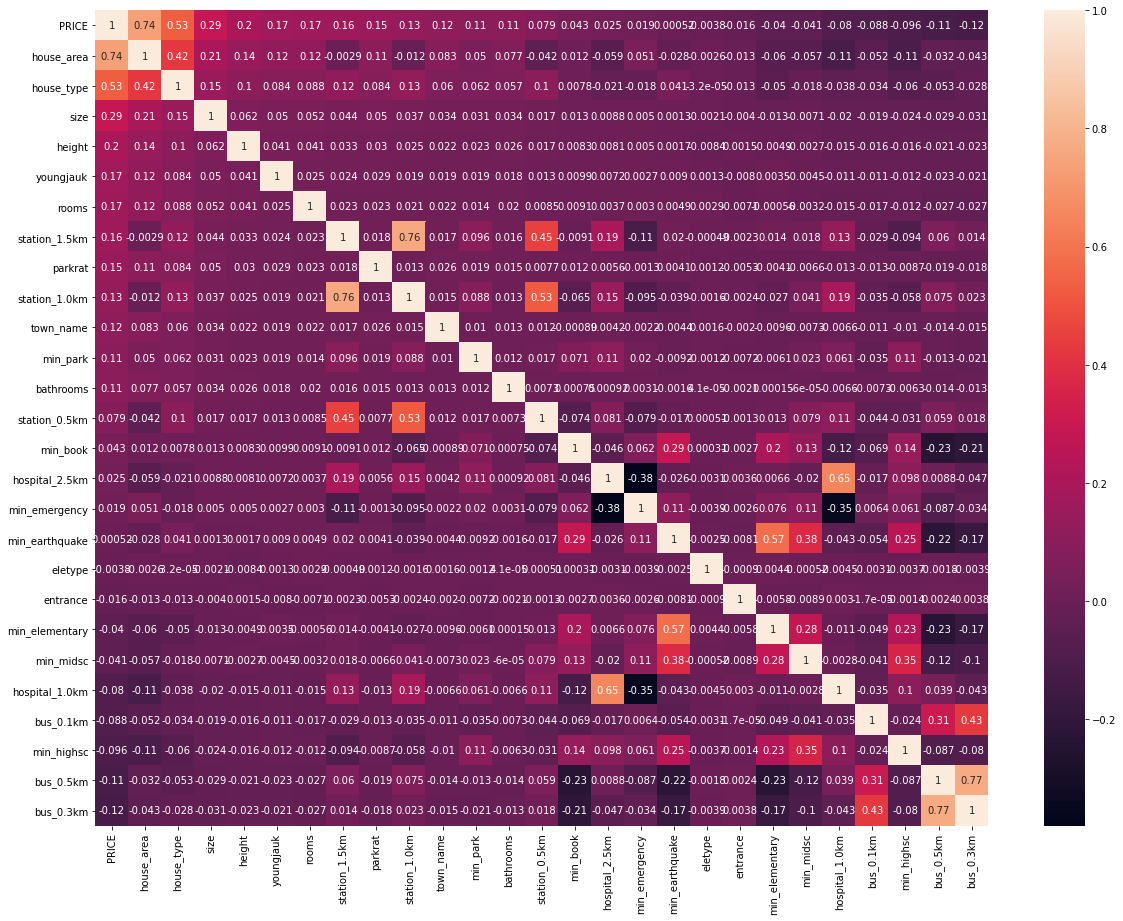

In [8]:
show_heatmap(datas)

# 2. Data 분석
## 2.1 Distribution of Target

### Skewness handling

In [9]:
# Right skewed data를 정규 분포에 가깝게 만든다.
# 각각 원본, log, coxbox

def show_skewness(target_col, datas=datas):
    figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(21,7)
    sns.distplot(datas[target_col], fit=norm, ax=ax1)
    sns.distplot(np.log(datas[target_col]+1), fit=norm, ax=ax2)
    sns.distplot(stats.boxcox(datas[target_col]+0.0001)[0], fit=norm, ax=ax3)

    print(f"Original skew: {datas[target_col].skew()}")
    print(f"Log skew: {np.log(datas[target_col]+1).skew()}")
    print(f"Coxbox skew: {pd.Series(stats.boxcox(datas[target_col]+0.0001)[0]).skew()}")

In [10]:
lmbda = stats.boxcox(datas['PRICE']+0.0001)[1]

Original skew: 4.178479531031767
Log skew: 0.46235966968686565
Coxbox skew: 0.0314936399995987


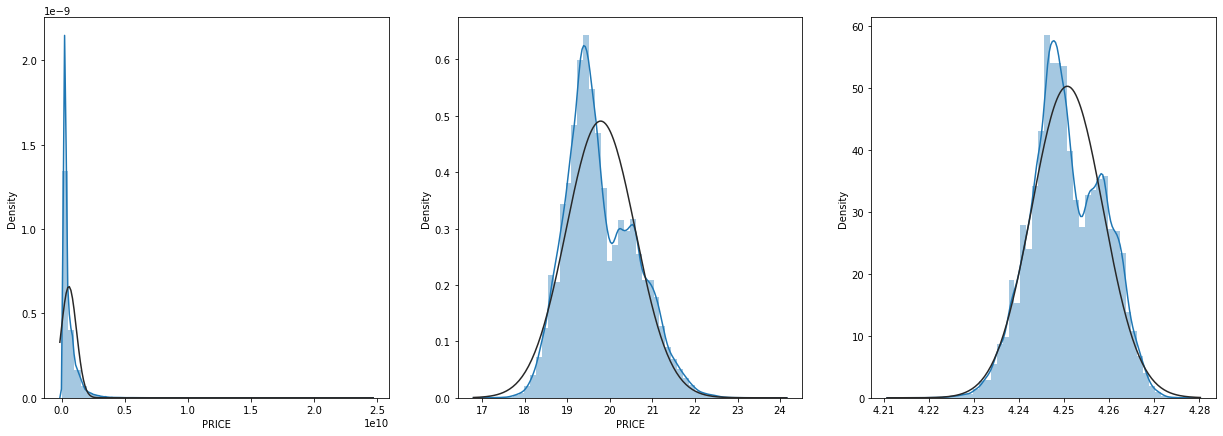

In [11]:
show_skewness('PRICE')

## 2.2 Feature correlation

## 3.2 Numeric Feature

In [12]:
skew_fixable_datas = datas.iloc[:, :-13]
skew_fixed_datas = skew_fixable_datas.apply(lambda col: stats.boxcox(col+0.0001)[0], axis=0)

In [13]:
skew_fixed_datas.describe()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE
count,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000,122469.000000
mean,-0.068374,-1.170131,-0.823506,-0.635925,-0.441170,-1.163924,0.266489,2.071617,7.588283,-8.079287,3.651760,9.351680,3.939698,4.250702
std,0.517474,0.341406,0.310716,0.378831,0.500490,0.377576,0.651376,2.009512,2.197660,7.472163,1.983768,3.217110,0.539899,0.007936
min,-2.138132,-2.477823,-1.930985,-1.901938,-2.285582,-2.759264,-2.006401,-2.387905,-2.193102,-14.522769,-1.789116,-1.539202,1.857553,4.212974
25%,-0.413862,-1.389564,-1.032729,-0.899916,-0.793305,-1.403311,-0.178742,0.801478,6.317929,-14.522769,2.601504,7.380591,3.486580,4.245284
50%,-0.063032,-1.163938,-0.806502,-0.616763,-0.429825,-1.165132,0.286913,2.277582,7.710635,-14.522769,3.914828,9.209363,3.970358,4.249916
75%,0.285490,-0.954996,-0.619947,-0.383791,-0.096759,-0.919674,0.709999,3.561182,8.896980,0.671469,5.020876,11.517632,4.271830,4.256923
max,1.525112,0.381680,0.769992,1.021513,1.916739,0.874528,2.620538,7.646529,16.358399,1.988598,10.545047,21.765612,6.427171,4.277933


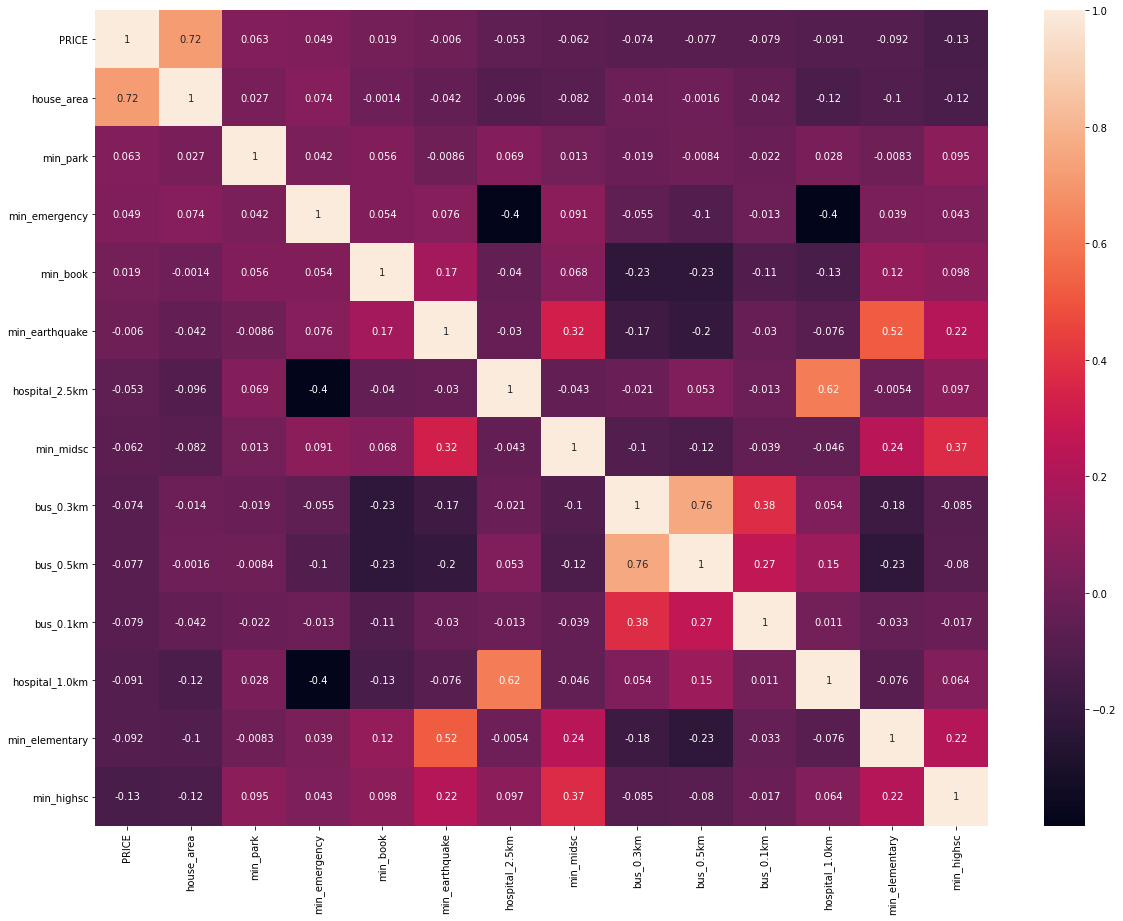

In [14]:
show_heatmap(skew_fixed_datas)

In [15]:
all_datas = datas
all_datas.iloc[:, :-13] = skew_fixed_datas

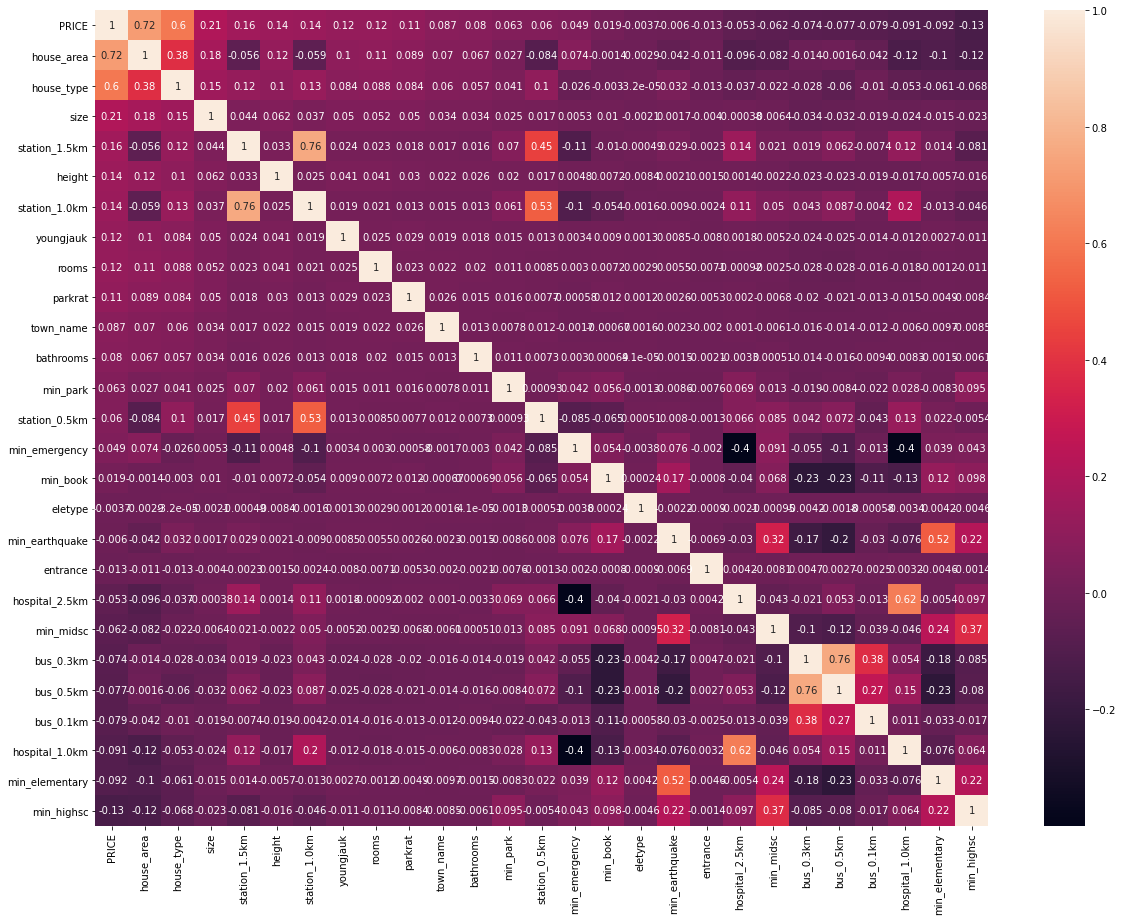

In [16]:
show_heatmap(all_datas)

## 3.3 Train test split

In [46]:
selected_data = all_datas[['PRICE', 'house_area', 'house_type', 'size', 'station_1.5km', 'height', 'station_1.0km']]

X = selected_data.drop(columns = ['PRICE'])
y = selected_data['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 77)

# 4. Training

In [18]:
# from sklearn.linear_model import ElasticNet, Lasso
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from xgboost import XGBRegressor

# import time
# #!pip3 install optuna
# import optuna
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

# model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

# model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
#                                          min_samples_split=10, loss='huber', random_state=18)

# model_XGB=XGBRegressor(colsample_bylevel=0.9229733609038979,colsample_bynode=0.21481791874780318,colsample_bytree=0.607964318297635, 
#                        gamma=0.8989889254961725, learning_rate=0.009192310189734834, max_depth=3, n_estimators=3602, 
#                        reg_alpha=3.185674564163364e-12,reg_lambda=4.95553539265423e-13, seed=18, subsample=0.8381904293270576,
#                        tree_method='gpu_hist',verbosity=0)

## Train by skew fixed features

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_RdmForest = RandomForestRegressor()
model_RdmForest.fit(Xtrain, Ytrain)
RdmForest_predictions=model_RdmForest.predict(Xtest)
train_RdmForest=model_RdmForest.predict(Xtrain)

In [48]:
from sklearn.metrics import mean_squared_error
boxcox_train_predictions = (train_RdmForest)
train_score=np.sqrt(mean_squared_error(Ytrain, boxcox_train_predictions))
train_score = special.inv_boxcox(train_score, lmbda)
print(f"Scoring with train data : {train_score}")

boxcox_predictions=(RdmForest_predictions)
predictions=special.inv_boxcox(boxcox_predictions, lmbda)

Scoring with train data : 1.0014348505734154


In [49]:
predictions

array([2.03901053e+08, 1.00847405e+09, 1.97585373e+08, ...,
       2.64664422e+08, 1.91955255e+08, 9.76958235e+08])

In [50]:
datas = pd.read_csv('./processed_datas/sm_data.csv', encoding='cp949')
datas.index.name = 'id'

datas.columns = ['Unnamed: 0', 'min_park', 'min_book', 'min_elementary', 'min_midsc',
       'min_highsc', 'min_earthquake', 'min_emergency', 'hospital_1.0km',
       'hospital_2.5km', 'bus_0.1km', 'bus_0.3km', 'bus_0.5km', 'house_area',
       'PRICE', 'house_type', 'station_0.5km', 'station_1.0km', 'station_1.5km',
        'height', 'youngjauk', 'size','rooms', 'bathrooms', 'entrance', 'eletype',
        'town_name', 'parkrat']
datas.drop(columns = ['Unnamed: 0'], inplace = True)

X = datas.drop(columns = ['PRICE'])
y = datas['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [51]:
Ytest

id
112699     306500000
36824      880000000
36899      151000000
100638    1400000000
57871      134500000
             ...    
121193     349000000
100377     190000000
90679      443500000
109658      85000000
14577      595000000
Name: PRICE, Length: 24494, dtype: int64

In [52]:
np.mean(Ytest-predictions)

38762324.41007927

In [53]:
np.sqrt(mean_squared_error(Ytest, predictions))

298408378.3511615

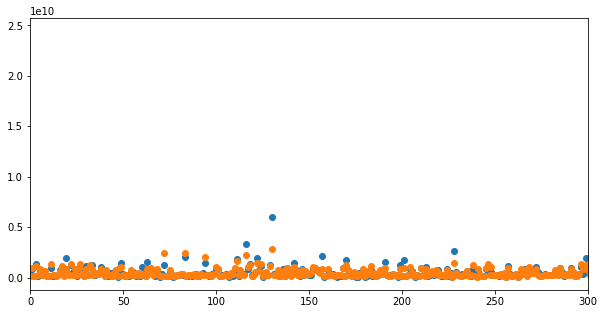

In [54]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 300)
plt.scatter(np.arange(len(Ytest)), Ytest)
plt.scatter(np.arange(len(Ytest)), predictions)

In [43]:
# importing required libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from lightgbm import LGBMRegressor


from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

In [44]:
X = all_datas.drop(columns = ['PRICE'])
y = all_datas['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [45]:
# choosing models to train and test

models = {
    "ridge": Ridge(),              # 72.14%
    "SGD": SGDRegressor(),         # -68439819176169989453745878161345654565109760.00 %
    "xg": XGBRegressor(),          # 85.87 %            == 333333333
    "lightGBM": LGBMRegressor(),   # lightGBM Accuracy: 82.62 %
    "catboost": CatBoostRegressor(), # 86.12 %          == 222222222
    "gradientB": GradientBoostingRegressor(), # 77.74 %
    "DecisionTree": DecisionTreeRegressor(),  # 82.06 %
    "Adaboost": AdaBoostRegressor(),  # 60.36 %
    "randomforest": RandomForestRegressor(), # 89.47    == 111111111
    "svr_rbf": SVR(kernel="rbf"),    # -38.12 %
    "svr_lin": SVR(kernel="linear"), # -38.12 %
    "svr_poly": SVR(kernel="poly"),  # -38.12 %
}

for name, model in models.items():
    accuracies = cross_val_score(estimator = model, X = X, y = y.ravel(), cv = 10)
    print(name, "Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

ridge Accuracy: 67.84 %
Standard Deviation: 1.53 %
SGD Accuracy: -32486612911982873327497398714368.00 %
Standard Deviation: 34125245111224260491609649446912.00 %
xg Accuracy: 84.56 %
Standard Deviation: 0.97 %
lightGBM Accuracy: 81.25 %
Standard Deviation: 0.94 %
Learning rate set to 0.086071
0:	learn: 0.0075102	total: 55.2ms	remaining: 55.2s
1:	learn: 0.0070939	total: 63.1ms	remaining: 31.5s
2:	learn: 0.0067295	total: 71.4ms	remaining: 23.7s
3:	learn: 0.0064018	total: 79.4ms	remaining: 19.8s
4:	learn: 0.0061186	total: 88.9ms	remaining: 17.7s
5:	learn: 0.0058688	total: 96.4ms	remaining: 16s
6:	learn: 0.0056449	total: 106ms	remaining: 15s
7:	learn: 0.0054529	total: 113ms	remaining: 14s
8:	learn: 0.0052841	total: 121ms	remaining: 13.3s
9:	learn: 0.0051364	total: 129ms	remaining: 12.8s
10:	learn: 0.0050082	total: 137ms	remaining: 12.3s
11:	learn: 0.0048952	total: 145ms	remaining: 12s
12:	learn: 0.0047973	total: 153ms	remaining: 11.6s
13:	learn: 0.0047144	total: 161ms	remaining: 11.3s
14:	

160:	learn: 0.0035937	total: 1.26s	remaining: 6.57s
161:	learn: 0.0035906	total: 1.27s	remaining: 6.57s
162:	learn: 0.0035884	total: 1.28s	remaining: 6.55s
163:	learn: 0.0035860	total: 1.28s	remaining: 6.54s
164:	learn: 0.0035832	total: 1.29s	remaining: 6.53s
165:	learn: 0.0035824	total: 1.3s	remaining: 6.52s
166:	learn: 0.0035796	total: 1.3s	remaining: 6.51s
167:	learn: 0.0035763	total: 1.31s	remaining: 6.5s
168:	learn: 0.0035743	total: 1.32s	remaining: 6.49s
169:	learn: 0.0035713	total: 1.33s	remaining: 6.48s
170:	learn: 0.0035682	total: 1.33s	remaining: 6.47s
171:	learn: 0.0035656	total: 1.34s	remaining: 6.46s
172:	learn: 0.0035622	total: 1.35s	remaining: 6.45s
173:	learn: 0.0035605	total: 1.36s	remaining: 6.44s
174:	learn: 0.0035583	total: 1.36s	remaining: 6.43s
175:	learn: 0.0035562	total: 1.37s	remaining: 6.42s
176:	learn: 0.0035544	total: 1.38s	remaining: 6.42s
177:	learn: 0.0035538	total: 1.39s	remaining: 6.41s
178:	learn: 0.0035509	total: 1.4s	remaining: 6.4s
179:	learn: 0.003

337:	learn: 0.0032754	total: 2.66s	remaining: 5.22s
338:	learn: 0.0032747	total: 2.67s	remaining: 5.21s
339:	learn: 0.0032734	total: 2.68s	remaining: 5.21s
340:	learn: 0.0032719	total: 2.7s	remaining: 5.21s
341:	learn: 0.0032698	total: 2.71s	remaining: 5.21s
342:	learn: 0.0032688	total: 2.72s	remaining: 5.21s
343:	learn: 0.0032675	total: 2.73s	remaining: 5.21s
344:	learn: 0.0032663	total: 2.74s	remaining: 5.2s
345:	learn: 0.0032644	total: 2.75s	remaining: 5.2s
346:	learn: 0.0032630	total: 2.76s	remaining: 5.2s
347:	learn: 0.0032616	total: 2.77s	remaining: 5.2s
348:	learn: 0.0032600	total: 2.79s	remaining: 5.2s
349:	learn: 0.0032588	total: 2.79s	remaining: 5.19s
350:	learn: 0.0032581	total: 2.8s	remaining: 5.19s
351:	learn: 0.0032569	total: 2.82s	remaining: 5.19s
352:	learn: 0.0032551	total: 2.83s	remaining: 5.18s
353:	learn: 0.0032542	total: 2.84s	remaining: 5.18s
354:	learn: 0.0032531	total: 2.85s	remaining: 5.18s
355:	learn: 0.0032519	total: 2.86s	remaining: 5.18s
356:	learn: 0.00325

506:	learn: 0.0031027	total: 4.07s	remaining: 3.96s
507:	learn: 0.0031022	total: 4.07s	remaining: 3.95s
508:	learn: 0.0031015	total: 4.08s	remaining: 3.94s
509:	learn: 0.0031007	total: 4.09s	remaining: 3.92s
510:	learn: 0.0031001	total: 4.09s	remaining: 3.92s
511:	learn: 0.0030998	total: 4.1s	remaining: 3.91s
512:	learn: 0.0030985	total: 4.11s	remaining: 3.9s
513:	learn: 0.0030980	total: 4.11s	remaining: 3.89s
514:	learn: 0.0030970	total: 4.12s	remaining: 3.88s
515:	learn: 0.0030959	total: 4.12s	remaining: 3.87s
516:	learn: 0.0030957	total: 4.13s	remaining: 3.86s
517:	learn: 0.0030949	total: 4.13s	remaining: 3.85s
518:	learn: 0.0030939	total: 4.14s	remaining: 3.84s
519:	learn: 0.0030926	total: 4.14s	remaining: 3.83s
520:	learn: 0.0030905	total: 4.15s	remaining: 3.82s
521:	learn: 0.0030897	total: 4.16s	remaining: 3.81s
522:	learn: 0.0030890	total: 4.17s	remaining: 3.8s
523:	learn: 0.0030882	total: 4.17s	remaining: 3.79s
524:	learn: 0.0030874	total: 4.18s	remaining: 3.78s
525:	learn: 0.0

668:	learn: 0.0029895	total: 5.07s	remaining: 2.51s
669:	learn: 0.0029886	total: 5.08s	remaining: 2.5s
670:	learn: 0.0029880	total: 5.08s	remaining: 2.49s
671:	learn: 0.0029871	total: 5.09s	remaining: 2.48s
672:	learn: 0.0029863	total: 5.09s	remaining: 2.48s
673:	learn: 0.0029856	total: 5.1s	remaining: 2.47s
674:	learn: 0.0029850	total: 5.11s	remaining: 2.46s
675:	learn: 0.0029847	total: 5.11s	remaining: 2.45s
676:	learn: 0.0029840	total: 5.12s	remaining: 2.44s
677:	learn: 0.0029833	total: 5.13s	remaining: 2.43s
678:	learn: 0.0029830	total: 5.13s	remaining: 2.43s
679:	learn: 0.0029824	total: 5.14s	remaining: 2.42s
680:	learn: 0.0029815	total: 5.14s	remaining: 2.41s
681:	learn: 0.0029805	total: 5.15s	remaining: 2.4s
682:	learn: 0.0029795	total: 5.16s	remaining: 2.39s
683:	learn: 0.0029791	total: 5.16s	remaining: 2.38s
684:	learn: 0.0029779	total: 5.17s	remaining: 2.38s
685:	learn: 0.0029770	total: 5.17s	remaining: 2.37s
686:	learn: 0.0029767	total: 5.18s	remaining: 2.36s
687:	learn: 0.0

828:	learn: 0.0029015	total: 6.06s	remaining: 1.25s
829:	learn: 0.0029012	total: 6.07s	remaining: 1.24s
830:	learn: 0.0029009	total: 6.07s	remaining: 1.24s
831:	learn: 0.0029004	total: 6.08s	remaining: 1.23s
832:	learn: 0.0028998	total: 6.09s	remaining: 1.22s
833:	learn: 0.0028994	total: 6.09s	remaining: 1.21s
834:	learn: 0.0028987	total: 6.1s	remaining: 1.21s
835:	learn: 0.0028979	total: 6.11s	remaining: 1.2s
836:	learn: 0.0028975	total: 6.11s	remaining: 1.19s
837:	learn: 0.0028969	total: 6.12s	remaining: 1.18s
838:	learn: 0.0028966	total: 6.12s	remaining: 1.18s
839:	learn: 0.0028963	total: 6.13s	remaining: 1.17s
840:	learn: 0.0028958	total: 6.14s	remaining: 1.16s
841:	learn: 0.0028954	total: 6.14s	remaining: 1.15s
842:	learn: 0.0028949	total: 6.15s	remaining: 1.15s
843:	learn: 0.0028944	total: 6.15s	remaining: 1.14s
844:	learn: 0.0028937	total: 6.16s	remaining: 1.13s
845:	learn: 0.0028932	total: 6.17s	remaining: 1.12s
846:	learn: 0.0028927	total: 6.17s	remaining: 1.11s
847:	learn: 0.

0:	learn: 0.0074601	total: 7.04ms	remaining: 7.04s
1:	learn: 0.0070477	total: 13.4ms	remaining: 6.7s
2:	learn: 0.0066864	total: 20.1ms	remaining: 6.67s
3:	learn: 0.0063647	total: 26.3ms	remaining: 6.54s
4:	learn: 0.0060837	total: 32.8ms	remaining: 6.52s
5:	learn: 0.0058361	total: 39.9ms	remaining: 6.6s
6:	learn: 0.0056175	total: 46ms	remaining: 6.53s
7:	learn: 0.0054268	total: 53.3ms	remaining: 6.61s
8:	learn: 0.0052599	total: 59.9ms	remaining: 6.6s
9:	learn: 0.0051138	total: 66.8ms	remaining: 6.61s
10:	learn: 0.0049873	total: 74ms	remaining: 6.65s
11:	learn: 0.0048752	total: 80.5ms	remaining: 6.62s
12:	learn: 0.0047799	total: 87.4ms	remaining: 6.63s
13:	learn: 0.0046960	total: 94.1ms	remaining: 6.62s
14:	learn: 0.0046199	total: 101ms	remaining: 6.62s
15:	learn: 0.0045565	total: 107ms	remaining: 6.6s
16:	learn: 0.0045000	total: 114ms	remaining: 6.58s
17:	learn: 0.0044474	total: 121ms	remaining: 6.57s
18:	learn: 0.0044015	total: 128ms	remaining: 6.62s
19:	learn: 0.0043603	total: 135ms	r

186:	learn: 0.0035203	total: 1.21s	remaining: 5.24s
187:	learn: 0.0035184	total: 1.21s	remaining: 5.24s
188:	learn: 0.0035163	total: 1.22s	remaining: 5.23s
189:	learn: 0.0035140	total: 1.23s	remaining: 5.22s
190:	learn: 0.0035103	total: 1.23s	remaining: 5.22s
191:	learn: 0.0035064	total: 1.24s	remaining: 5.21s
192:	learn: 0.0035039	total: 1.25s	remaining: 5.21s
193:	learn: 0.0035022	total: 1.25s	remaining: 5.2s
194:	learn: 0.0034986	total: 1.26s	remaining: 5.2s
195:	learn: 0.0034969	total: 1.27s	remaining: 5.2s
196:	learn: 0.0034935	total: 1.27s	remaining: 5.19s
197:	learn: 0.0034912	total: 1.28s	remaining: 5.18s
198:	learn: 0.0034902	total: 1.29s	remaining: 5.18s
199:	learn: 0.0034884	total: 1.29s	remaining: 5.17s
200:	learn: 0.0034870	total: 1.3s	remaining: 5.17s
201:	learn: 0.0034842	total: 1.31s	remaining: 5.16s
202:	learn: 0.0034832	total: 1.31s	remaining: 5.16s
203:	learn: 0.0034814	total: 1.32s	remaining: 5.15s
204:	learn: 0.0034787	total: 1.33s	remaining: 5.14s
205:	learn: 0.00

366:	learn: 0.0032230	total: 2.4s	remaining: 4.15s
367:	learn: 0.0032223	total: 2.41s	remaining: 4.14s
368:	learn: 0.0032199	total: 2.42s	remaining: 4.13s
369:	learn: 0.0032181	total: 2.42s	remaining: 4.13s
370:	learn: 0.0032168	total: 2.43s	remaining: 4.12s
371:	learn: 0.0032157	total: 2.44s	remaining: 4.12s
372:	learn: 0.0032147	total: 2.44s	remaining: 4.11s
373:	learn: 0.0032135	total: 2.45s	remaining: 4.1s
374:	learn: 0.0032120	total: 2.46s	remaining: 4.1s
375:	learn: 0.0032110	total: 2.47s	remaining: 4.09s
376:	learn: 0.0032104	total: 2.47s	remaining: 4.08s
377:	learn: 0.0032089	total: 2.48s	remaining: 4.08s
378:	learn: 0.0032076	total: 2.49s	remaining: 4.07s
379:	learn: 0.0032069	total: 2.49s	remaining: 4.07s
380:	learn: 0.0032058	total: 2.5s	remaining: 4.06s
381:	learn: 0.0032042	total: 2.51s	remaining: 4.05s
382:	learn: 0.0032032	total: 2.51s	remaining: 4.05s
383:	learn: 0.0032026	total: 2.52s	remaining: 4.04s
384:	learn: 0.0032015	total: 2.53s	remaining: 4.04s
385:	learn: 0.00

549:	learn: 0.0030589	total: 3.6s	remaining: 2.95s
550:	learn: 0.0030583	total: 3.61s	remaining: 2.94s
551:	learn: 0.0030577	total: 3.62s	remaining: 2.94s
552:	learn: 0.0030567	total: 3.62s	remaining: 2.93s
553:	learn: 0.0030559	total: 3.63s	remaining: 2.92s
554:	learn: 0.0030546	total: 3.64s	remaining: 2.92s
555:	learn: 0.0030542	total: 3.65s	remaining: 2.91s
556:	learn: 0.0030536	total: 3.65s	remaining: 2.9s
557:	learn: 0.0030532	total: 3.66s	remaining: 2.9s
558:	learn: 0.0030526	total: 3.67s	remaining: 2.89s
559:	learn: 0.0030520	total: 3.67s	remaining: 2.88s
560:	learn: 0.0030515	total: 3.68s	remaining: 2.88s
561:	learn: 0.0030509	total: 3.68s	remaining: 2.87s
562:	learn: 0.0030503	total: 3.69s	remaining: 2.86s
563:	learn: 0.0030499	total: 3.7s	remaining: 2.86s
564:	learn: 0.0030486	total: 3.7s	remaining: 2.85s
565:	learn: 0.0030478	total: 3.71s	remaining: 2.84s
566:	learn: 0.0030473	total: 3.71s	remaining: 2.84s
567:	learn: 0.0030465	total: 3.72s	remaining: 2.83s
568:	learn: 0.003

728:	learn: 0.0029425	total: 4.81s	remaining: 1.79s
729:	learn: 0.0029419	total: 4.81s	remaining: 1.78s
730:	learn: 0.0029416	total: 4.82s	remaining: 1.77s
731:	learn: 0.0029407	total: 4.83s	remaining: 1.77s
732:	learn: 0.0029399	total: 4.83s	remaining: 1.76s
733:	learn: 0.0029393	total: 4.84s	remaining: 1.75s
734:	learn: 0.0029386	total: 4.85s	remaining: 1.75s
735:	learn: 0.0029380	total: 4.86s	remaining: 1.74s
736:	learn: 0.0029377	total: 4.86s	remaining: 1.73s
737:	learn: 0.0029370	total: 4.87s	remaining: 1.73s
738:	learn: 0.0029367	total: 4.87s	remaining: 1.72s
739:	learn: 0.0029358	total: 4.88s	remaining: 1.72s
740:	learn: 0.0029350	total: 4.89s	remaining: 1.71s
741:	learn: 0.0029346	total: 4.89s	remaining: 1.7s
742:	learn: 0.0029340	total: 4.9s	remaining: 1.7s
743:	learn: 0.0029335	total: 4.91s	remaining: 1.69s
744:	learn: 0.0029327	total: 4.91s	remaining: 1.68s
745:	learn: 0.0029321	total: 4.92s	remaining: 1.68s
746:	learn: 0.0029316	total: 4.93s	remaining: 1.67s
747:	learn: 0.0

908:	learn: 0.0028513	total: 6.01s	remaining: 602ms
909:	learn: 0.0028511	total: 6.02s	remaining: 595ms
910:	learn: 0.0028507	total: 6.03s	remaining: 589ms
911:	learn: 0.0028502	total: 6.03s	remaining: 582ms
912:	learn: 0.0028496	total: 6.04s	remaining: 575ms
913:	learn: 0.0028493	total: 6.04s	remaining: 569ms
914:	learn: 0.0028489	total: 6.05s	remaining: 562ms
915:	learn: 0.0028483	total: 6.06s	remaining: 556ms
916:	learn: 0.0028479	total: 6.07s	remaining: 549ms
917:	learn: 0.0028476	total: 6.07s	remaining: 542ms
918:	learn: 0.0028473	total: 6.08s	remaining: 536ms
919:	learn: 0.0028470	total: 6.08s	remaining: 529ms
920:	learn: 0.0028464	total: 6.09s	remaining: 522ms
921:	learn: 0.0028457	total: 6.1s	remaining: 516ms
922:	learn: 0.0028451	total: 6.11s	remaining: 509ms
923:	learn: 0.0028449	total: 6.11s	remaining: 503ms
924:	learn: 0.0028443	total: 6.12s	remaining: 496ms
925:	learn: 0.0028441	total: 6.13s	remaining: 489ms
926:	learn: 0.0028440	total: 6.13s	remaining: 483ms
927:	learn: 0

75:	learn: 0.0038390	total: 514ms	remaining: 6.25s
76:	learn: 0.0038337	total: 521ms	remaining: 6.24s
77:	learn: 0.0038308	total: 527ms	remaining: 6.23s
78:	learn: 0.0038242	total: 534ms	remaining: 6.22s
79:	learn: 0.0038212	total: 540ms	remaining: 6.21s
80:	learn: 0.0038186	total: 547ms	remaining: 6.2s
81:	learn: 0.0038168	total: 553ms	remaining: 6.19s
82:	learn: 0.0038134	total: 561ms	remaining: 6.2s
83:	learn: 0.0038088	total: 568ms	remaining: 6.19s
84:	learn: 0.0038058	total: 574ms	remaining: 6.18s
85:	learn: 0.0038022	total: 580ms	remaining: 6.17s
86:	learn: 0.0037986	total: 587ms	remaining: 6.16s
87:	learn: 0.0037952	total: 594ms	remaining: 6.15s
88:	learn: 0.0037899	total: 600ms	remaining: 6.15s
89:	learn: 0.0037876	total: 607ms	remaining: 6.14s
90:	learn: 0.0037838	total: 614ms	remaining: 6.13s
91:	learn: 0.0037794	total: 621ms	remaining: 6.13s
92:	learn: 0.0037770	total: 627ms	remaining: 6.11s
93:	learn: 0.0037746	total: 634ms	remaining: 6.11s
94:	learn: 0.0037710	total: 640ms

253:	learn: 0.0033976	total: 1.71s	remaining: 5.02s
254:	learn: 0.0033952	total: 1.72s	remaining: 5.02s
255:	learn: 0.0033931	total: 1.73s	remaining: 5.01s
256:	learn: 0.0033917	total: 1.73s	remaining: 5.01s
257:	learn: 0.0033904	total: 1.74s	remaining: 5s
258:	learn: 0.0033888	total: 1.75s	remaining: 5s
259:	learn: 0.0033865	total: 1.75s	remaining: 4.99s
260:	learn: 0.0033850	total: 1.76s	remaining: 4.98s
261:	learn: 0.0033826	total: 1.76s	remaining: 4.97s
262:	learn: 0.0033805	total: 1.77s	remaining: 4.97s
263:	learn: 0.0033791	total: 1.78s	remaining: 4.96s
264:	learn: 0.0033761	total: 1.79s	remaining: 4.96s
265:	learn: 0.0033736	total: 1.79s	remaining: 4.95s
266:	learn: 0.0033726	total: 1.8s	remaining: 4.94s
267:	learn: 0.0033705	total: 1.81s	remaining: 4.94s
268:	learn: 0.0033688	total: 1.81s	remaining: 4.93s
269:	learn: 0.0033668	total: 1.82s	remaining: 4.92s
270:	learn: 0.0033652	total: 1.83s	remaining: 4.92s
271:	learn: 0.0033639	total: 1.83s	remaining: 4.91s
272:	learn: 0.00336

429:	learn: 0.0031751	total: 2.91s	remaining: 3.85s
430:	learn: 0.0031746	total: 2.91s	remaining: 3.85s
431:	learn: 0.0031738	total: 2.92s	remaining: 3.84s
432:	learn: 0.0031730	total: 2.92s	remaining: 3.83s
433:	learn: 0.0031716	total: 2.93s	remaining: 3.82s
434:	learn: 0.0031703	total: 2.94s	remaining: 3.82s
435:	learn: 0.0031696	total: 2.95s	remaining: 3.81s
436:	learn: 0.0031683	total: 2.95s	remaining: 3.81s
437:	learn: 0.0031677	total: 2.96s	remaining: 3.8s
438:	learn: 0.0031672	total: 2.96s	remaining: 3.79s
439:	learn: 0.0031664	total: 2.97s	remaining: 3.78s
440:	learn: 0.0031655	total: 2.98s	remaining: 3.77s
441:	learn: 0.0031651	total: 2.98s	remaining: 3.77s
442:	learn: 0.0031646	total: 2.99s	remaining: 3.76s
443:	learn: 0.0031638	total: 3s	remaining: 3.75s
444:	learn: 0.0031628	total: 3s	remaining: 3.75s
445:	learn: 0.0031619	total: 3.01s	remaining: 3.74s
446:	learn: 0.0031612	total: 3.02s	remaining: 3.73s
447:	learn: 0.0031605	total: 3.03s	remaining: 3.73s
448:	learn: 0.00315

602:	learn: 0.0030376	total: 4.11s	remaining: 2.7s
603:	learn: 0.0030371	total: 4.11s	remaining: 2.7s
604:	learn: 0.0030367	total: 4.12s	remaining: 2.69s
605:	learn: 0.0030359	total: 4.13s	remaining: 2.68s
606:	learn: 0.0030352	total: 4.13s	remaining: 2.68s
607:	learn: 0.0030347	total: 4.14s	remaining: 2.67s
608:	learn: 0.0030338	total: 4.15s	remaining: 2.66s
609:	learn: 0.0030333	total: 4.15s	remaining: 2.65s
610:	learn: 0.0030329	total: 4.16s	remaining: 2.65s
611:	learn: 0.0030321	total: 4.17s	remaining: 2.64s
612:	learn: 0.0030316	total: 4.17s	remaining: 2.63s
613:	learn: 0.0030306	total: 4.18s	remaining: 2.63s
614:	learn: 0.0030300	total: 4.19s	remaining: 2.62s
615:	learn: 0.0030295	total: 4.19s	remaining: 2.62s
616:	learn: 0.0030288	total: 4.2s	remaining: 2.61s
617:	learn: 0.0030283	total: 4.21s	remaining: 2.6s
618:	learn: 0.0030276	total: 4.21s	remaining: 2.59s
619:	learn: 0.0030270	total: 4.22s	remaining: 2.59s
620:	learn: 0.0030263	total: 4.23s	remaining: 2.58s
621:	learn: 0.00

776:	learn: 0.0029326	total: 5.3s	remaining: 1.52s
777:	learn: 0.0029324	total: 5.31s	remaining: 1.51s
778:	learn: 0.0029320	total: 5.31s	remaining: 1.51s
779:	learn: 0.0029314	total: 5.32s	remaining: 1.5s
780:	learn: 0.0029304	total: 5.33s	remaining: 1.49s
781:	learn: 0.0029298	total: 5.33s	remaining: 1.49s
782:	learn: 0.0029295	total: 5.34s	remaining: 1.48s
783:	learn: 0.0029287	total: 5.35s	remaining: 1.47s
784:	learn: 0.0029283	total: 5.35s	remaining: 1.47s
785:	learn: 0.0029275	total: 5.36s	remaining: 1.46s
786:	learn: 0.0029268	total: 5.37s	remaining: 1.45s
787:	learn: 0.0029262	total: 5.38s	remaining: 1.45s
788:	learn: 0.0029254	total: 5.38s	remaining: 1.44s
789:	learn: 0.0029249	total: 5.39s	remaining: 1.43s
790:	learn: 0.0029246	total: 5.4s	remaining: 1.43s
791:	learn: 0.0029242	total: 5.4s	remaining: 1.42s
792:	learn: 0.0029235	total: 5.41s	remaining: 1.41s
793:	learn: 0.0029227	total: 5.42s	remaining: 1.41s
794:	learn: 0.0029222	total: 5.43s	remaining: 1.4s
795:	learn: 0.002

948:	learn: 0.0028481	total: 6.5s	remaining: 349ms
949:	learn: 0.0028476	total: 6.51s	remaining: 343ms
950:	learn: 0.0028473	total: 6.51s	remaining: 336ms
951:	learn: 0.0028470	total: 6.52s	remaining: 329ms
952:	learn: 0.0028464	total: 6.53s	remaining: 322ms
953:	learn: 0.0028458	total: 6.54s	remaining: 315ms
954:	learn: 0.0028456	total: 6.54s	remaining: 308ms
955:	learn: 0.0028453	total: 6.55s	remaining: 302ms
956:	learn: 0.0028448	total: 6.56s	remaining: 295ms
957:	learn: 0.0028443	total: 6.57s	remaining: 288ms
958:	learn: 0.0028440	total: 6.57s	remaining: 281ms
959:	learn: 0.0028436	total: 6.58s	remaining: 274ms
960:	learn: 0.0028432	total: 6.59s	remaining: 267ms
961:	learn: 0.0028430	total: 6.59s	remaining: 260ms
962:	learn: 0.0028428	total: 6.6s	remaining: 254ms
963:	learn: 0.0028424	total: 6.61s	remaining: 247ms
964:	learn: 0.0028422	total: 6.61s	remaining: 240ms
965:	learn: 0.0028415	total: 6.62s	remaining: 233ms
966:	learn: 0.0028412	total: 6.63s	remaining: 226ms
967:	learn: 0.

113:	learn: 0.0037030	total: 791ms	remaining: 6.14s
114:	learn: 0.0036978	total: 798ms	remaining: 6.14s
115:	learn: 0.0036967	total: 805ms	remaining: 6.13s
116:	learn: 0.0036935	total: 812ms	remaining: 6.13s
117:	learn: 0.0036896	total: 819ms	remaining: 6.12s
118:	learn: 0.0036865	total: 825ms	remaining: 6.11s
119:	learn: 0.0036838	total: 832ms	remaining: 6.1s
120:	learn: 0.0036810	total: 838ms	remaining: 6.09s
121:	learn: 0.0036783	total: 844ms	remaining: 6.08s
122:	learn: 0.0036750	total: 851ms	remaining: 6.07s
123:	learn: 0.0036734	total: 858ms	remaining: 6.06s
124:	learn: 0.0036704	total: 864ms	remaining: 6.05s
125:	learn: 0.0036688	total: 871ms	remaining: 6.04s
126:	learn: 0.0036633	total: 878ms	remaining: 6.04s
127:	learn: 0.0036606	total: 886ms	remaining: 6.03s
128:	learn: 0.0036580	total: 892ms	remaining: 6.03s
129:	learn: 0.0036554	total: 900ms	remaining: 6.02s
130:	learn: 0.0036534	total: 907ms	remaining: 6.02s
131:	learn: 0.0036518	total: 914ms	remaining: 6.01s
132:	learn: 0

286:	learn: 0.0033379	total: 1.99s	remaining: 4.95s
287:	learn: 0.0033367	total: 2s	remaining: 4.94s
288:	learn: 0.0033352	total: 2.01s	remaining: 4.94s
289:	learn: 0.0033337	total: 2.01s	remaining: 4.93s
290:	learn: 0.0033323	total: 2.02s	remaining: 4.93s
291:	learn: 0.0033298	total: 2.03s	remaining: 4.92s
292:	learn: 0.0033285	total: 2.04s	remaining: 4.91s
293:	learn: 0.0033271	total: 2.04s	remaining: 4.91s
294:	learn: 0.0033256	total: 2.05s	remaining: 4.9s
295:	learn: 0.0033235	total: 2.06s	remaining: 4.89s
296:	learn: 0.0033225	total: 2.06s	remaining: 4.89s
297:	learn: 0.0033214	total: 2.07s	remaining: 4.88s
298:	learn: 0.0033201	total: 2.08s	remaining: 4.88s
299:	learn: 0.0033192	total: 2.08s	remaining: 4.87s
300:	learn: 0.0033181	total: 2.09s	remaining: 4.86s
301:	learn: 0.0033166	total: 2.1s	remaining: 4.85s
302:	learn: 0.0033153	total: 2.11s	remaining: 4.84s
303:	learn: 0.0033140	total: 2.11s	remaining: 4.84s
304:	learn: 0.0033123	total: 2.12s	remaining: 4.83s
305:	learn: 0.003

457:	learn: 0.0031438	total: 3.19s	remaining: 3.77s
458:	learn: 0.0031432	total: 3.19s	remaining: 3.76s
459:	learn: 0.0031420	total: 3.2s	remaining: 3.76s
460:	learn: 0.0031414	total: 3.21s	remaining: 3.75s
461:	learn: 0.0031402	total: 3.21s	remaining: 3.74s
462:	learn: 0.0031396	total: 3.22s	remaining: 3.74s
463:	learn: 0.0031385	total: 3.23s	remaining: 3.73s
464:	learn: 0.0031378	total: 3.24s	remaining: 3.72s
465:	learn: 0.0031371	total: 3.24s	remaining: 3.71s
466:	learn: 0.0031352	total: 3.25s	remaining: 3.71s
467:	learn: 0.0031342	total: 3.26s	remaining: 3.7s
468:	learn: 0.0031337	total: 3.26s	remaining: 3.69s
469:	learn: 0.0031326	total: 3.27s	remaining: 3.69s
470:	learn: 0.0031309	total: 3.28s	remaining: 3.68s
471:	learn: 0.0031304	total: 3.28s	remaining: 3.67s
472:	learn: 0.0031298	total: 3.29s	remaining: 3.67s
473:	learn: 0.0031288	total: 3.3s	remaining: 3.66s
474:	learn: 0.0031281	total: 3.31s	remaining: 3.65s
475:	learn: 0.0031276	total: 3.31s	remaining: 3.65s
476:	learn: 0.0

630:	learn: 0.0030142	total: 4.39s	remaining: 2.57s
631:	learn: 0.0030133	total: 4.39s	remaining: 2.56s
632:	learn: 0.0030122	total: 4.4s	remaining: 2.55s
633:	learn: 0.0030116	total: 4.41s	remaining: 2.54s
634:	learn: 0.0030110	total: 4.42s	remaining: 2.54s
635:	learn: 0.0030100	total: 4.42s	remaining: 2.53s
636:	learn: 0.0030094	total: 4.43s	remaining: 2.52s
637:	learn: 0.0030086	total: 4.44s	remaining: 2.52s
638:	learn: 0.0030080	total: 4.44s	remaining: 2.51s
639:	learn: 0.0030071	total: 4.45s	remaining: 2.5s
640:	learn: 0.0030065	total: 4.46s	remaining: 2.5s
641:	learn: 0.0030061	total: 4.46s	remaining: 2.49s
642:	learn: 0.0030055	total: 4.47s	remaining: 2.48s
643:	learn: 0.0030045	total: 4.48s	remaining: 2.48s
644:	learn: 0.0030039	total: 4.49s	remaining: 2.47s
645:	learn: 0.0030031	total: 4.49s	remaining: 2.46s
646:	learn: 0.0030022	total: 4.5s	remaining: 2.46s
647:	learn: 0.0030014	total: 4.51s	remaining: 2.45s
648:	learn: 0.0030005	total: 4.51s	remaining: 2.44s
649:	learn: 0.00

802:	learn: 0.0029108	total: 5.58s	remaining: 1.37s
803:	learn: 0.0029105	total: 5.59s	remaining: 1.36s
804:	learn: 0.0029099	total: 5.59s	remaining: 1.35s
805:	learn: 0.0029095	total: 5.6s	remaining: 1.35s
806:	learn: 0.0029089	total: 5.61s	remaining: 1.34s
807:	learn: 0.0029084	total: 5.62s	remaining: 1.33s
808:	learn: 0.0029076	total: 5.62s	remaining: 1.33s
809:	learn: 0.0029070	total: 5.63s	remaining: 1.32s
810:	learn: 0.0029064	total: 5.63s	remaining: 1.31s
811:	learn: 0.0029057	total: 5.64s	remaining: 1.31s
812:	learn: 0.0029053	total: 5.65s	remaining: 1.3s
813:	learn: 0.0029046	total: 5.66s	remaining: 1.29s
814:	learn: 0.0029042	total: 5.66s	remaining: 1.28s
815:	learn: 0.0029037	total: 5.67s	remaining: 1.28s
816:	learn: 0.0029030	total: 5.68s	remaining: 1.27s
817:	learn: 0.0029027	total: 5.68s	remaining: 1.26s
818:	learn: 0.0029024	total: 5.69s	remaining: 1.26s
819:	learn: 0.0029023	total: 5.7s	remaining: 1.25s
820:	learn: 0.0029017	total: 5.7s	remaining: 1.24s
821:	learn: 0.00

976:	learn: 0.0028274	total: 6.78s	remaining: 160ms
977:	learn: 0.0028272	total: 6.78s	remaining: 153ms
978:	learn: 0.0028267	total: 6.79s	remaining: 146ms
979:	learn: 0.0028261	total: 6.8s	remaining: 139ms
980:	learn: 0.0028254	total: 6.81s	remaining: 132ms
981:	learn: 0.0028249	total: 6.81s	remaining: 125ms
982:	learn: 0.0028245	total: 6.82s	remaining: 118ms
983:	learn: 0.0028242	total: 6.83s	remaining: 111ms
984:	learn: 0.0028237	total: 6.83s	remaining: 104ms
985:	learn: 0.0028232	total: 6.84s	remaining: 97.1ms
986:	learn: 0.0028229	total: 6.85s	remaining: 90.2ms
987:	learn: 0.0028222	total: 6.85s	remaining: 83.2ms
988:	learn: 0.0028219	total: 6.86s	remaining: 76.3ms
989:	learn: 0.0028214	total: 6.87s	remaining: 69.4ms
990:	learn: 0.0028209	total: 6.88s	remaining: 62.4ms
991:	learn: 0.0028206	total: 6.88s	remaining: 55.5ms
992:	learn: 0.0028203	total: 6.89s	remaining: 48.6ms
993:	learn: 0.0028199	total: 6.9s	remaining: 41.6ms
994:	learn: 0.0028195	total: 6.9s	remaining: 34.7ms
995:	

142:	learn: 0.0036440	total: 989ms	remaining: 5.93s
143:	learn: 0.0036412	total: 996ms	remaining: 5.92s
144:	learn: 0.0036378	total: 1s	remaining: 5.92s
145:	learn: 0.0036356	total: 1.01s	remaining: 5.91s
146:	learn: 0.0036341	total: 1.02s	remaining: 5.9s
147:	learn: 0.0036310	total: 1.02s	remaining: 5.89s
148:	learn: 0.0036294	total: 1.03s	remaining: 5.88s
149:	learn: 0.0036259	total: 1.04s	remaining: 5.88s
150:	learn: 0.0036233	total: 1.04s	remaining: 5.87s
151:	learn: 0.0036219	total: 1.05s	remaining: 5.86s
152:	learn: 0.0036199	total: 1.06s	remaining: 5.86s
153:	learn: 0.0036168	total: 1.06s	remaining: 5.85s
154:	learn: 0.0036145	total: 1.07s	remaining: 5.84s
155:	learn: 0.0036122	total: 1.08s	remaining: 5.83s
156:	learn: 0.0036094	total: 1.08s	remaining: 5.83s
157:	learn: 0.0036071	total: 1.09s	remaining: 5.82s
158:	learn: 0.0036046	total: 1.1s	remaining: 5.81s
159:	learn: 0.0036015	total: 1.1s	remaining: 5.8s
160:	learn: 0.0036004	total: 1.11s	remaining: 5.79s
161:	learn: 0.00359

313:	learn: 0.0032969	total: 2.19s	remaining: 4.79s
314:	learn: 0.0032951	total: 2.2s	remaining: 4.78s
315:	learn: 0.0032940	total: 2.21s	remaining: 4.78s
316:	learn: 0.0032931	total: 2.21s	remaining: 4.77s
317:	learn: 0.0032912	total: 2.22s	remaining: 4.76s
318:	learn: 0.0032898	total: 2.23s	remaining: 4.76s
319:	learn: 0.0032884	total: 2.24s	remaining: 4.75s
320:	learn: 0.0032862	total: 2.24s	remaining: 4.74s
321:	learn: 0.0032848	total: 2.25s	remaining: 4.74s
322:	learn: 0.0032829	total: 2.26s	remaining: 4.73s
323:	learn: 0.0032818	total: 2.26s	remaining: 4.72s
324:	learn: 0.0032806	total: 2.27s	remaining: 4.72s
325:	learn: 0.0032794	total: 2.28s	remaining: 4.71s
326:	learn: 0.0032779	total: 2.29s	remaining: 4.7s
327:	learn: 0.0032766	total: 2.29s	remaining: 4.7s
328:	learn: 0.0032754	total: 2.3s	remaining: 4.69s
329:	learn: 0.0032738	total: 2.31s	remaining: 4.68s
330:	learn: 0.0032732	total: 2.31s	remaining: 4.68s
331:	learn: 0.0032716	total: 2.32s	remaining: 4.67s
332:	learn: 0.00

486:	learn: 0.0031178	total: 3.4s	remaining: 3.58s
487:	learn: 0.0031167	total: 3.41s	remaining: 3.58s
488:	learn: 0.0031155	total: 3.42s	remaining: 3.57s
489:	learn: 0.0031148	total: 3.42s	remaining: 3.56s
490:	learn: 0.0031142	total: 3.43s	remaining: 3.55s
491:	learn: 0.0031126	total: 3.44s	remaining: 3.55s
492:	learn: 0.0031115	total: 3.44s	remaining: 3.54s
493:	learn: 0.0031106	total: 3.45s	remaining: 3.53s
494:	learn: 0.0031096	total: 3.46s	remaining: 3.53s
495:	learn: 0.0031091	total: 3.46s	remaining: 3.52s
496:	learn: 0.0031079	total: 3.47s	remaining: 3.51s
497:	learn: 0.0031069	total: 3.48s	remaining: 3.5s
498:	learn: 0.0031064	total: 3.48s	remaining: 3.5s
499:	learn: 0.0031056	total: 3.49s	remaining: 3.49s
500:	learn: 0.0031049	total: 3.5s	remaining: 3.48s
501:	learn: 0.0031043	total: 3.5s	remaining: 3.48s
502:	learn: 0.0031039	total: 3.51s	remaining: 3.47s
503:	learn: 0.0031033	total: 3.52s	remaining: 3.46s
504:	learn: 0.0031022	total: 3.52s	remaining: 3.46s
505:	learn: 0.003

665:	learn: 0.0029899	total: 4.82s	remaining: 2.42s
666:	learn: 0.0029896	total: 4.83s	remaining: 2.41s
667:	learn: 0.0029889	total: 4.83s	remaining: 2.4s
668:	learn: 0.0029884	total: 4.84s	remaining: 2.4s
669:	learn: 0.0029881	total: 4.85s	remaining: 2.39s
670:	learn: 0.0029877	total: 4.86s	remaining: 2.38s
671:	learn: 0.0029873	total: 4.87s	remaining: 2.37s
672:	learn: 0.0029865	total: 4.88s	remaining: 2.37s
673:	learn: 0.0029861	total: 4.88s	remaining: 2.36s
674:	learn: 0.0029855	total: 4.89s	remaining: 2.35s
675:	learn: 0.0029849	total: 4.9s	remaining: 2.35s
676:	learn: 0.0029842	total: 4.91s	remaining: 2.34s
677:	learn: 0.0029834	total: 4.92s	remaining: 2.33s
678:	learn: 0.0029829	total: 4.93s	remaining: 2.33s
679:	learn: 0.0029824	total: 4.93s	remaining: 2.32s
680:	learn: 0.0029817	total: 4.94s	remaining: 2.31s
681:	learn: 0.0029815	total: 4.95s	remaining: 2.31s
682:	learn: 0.0029807	total: 4.96s	remaining: 2.3s
683:	learn: 0.0029801	total: 4.97s	remaining: 2.29s
684:	learn: 0.00

826:	learn: 0.0028998	total: 6.22s	remaining: 1.3s
827:	learn: 0.0028989	total: 6.23s	remaining: 1.29s
828:	learn: 0.0028984	total: 6.24s	remaining: 1.29s
829:	learn: 0.0028978	total: 6.25s	remaining: 1.28s
830:	learn: 0.0028974	total: 6.26s	remaining: 1.27s
831:	learn: 0.0028971	total: 6.26s	remaining: 1.26s
832:	learn: 0.0028969	total: 6.27s	remaining: 1.26s
833:	learn: 0.0028964	total: 6.28s	remaining: 1.25s
834:	learn: 0.0028958	total: 6.29s	remaining: 1.24s
835:	learn: 0.0028956	total: 6.3s	remaining: 1.24s
836:	learn: 0.0028953	total: 6.3s	remaining: 1.23s
837:	learn: 0.0028947	total: 6.32s	remaining: 1.22s
838:	learn: 0.0028944	total: 6.32s	remaining: 1.21s
839:	learn: 0.0028940	total: 6.33s	remaining: 1.21s
840:	learn: 0.0028936	total: 6.34s	remaining: 1.2s
841:	learn: 0.0028928	total: 6.35s	remaining: 1.19s
842:	learn: 0.0028925	total: 6.36s	remaining: 1.18s
843:	learn: 0.0028921	total: 6.37s	remaining: 1.18s
844:	learn: 0.0028920	total: 6.37s	remaining: 1.17s
845:	learn: 0.00

987:	learn: 0.0028274	total: 7.63s	remaining: 92.7ms
988:	learn: 0.0028269	total: 7.64s	remaining: 84.9ms
989:	learn: 0.0028263	total: 7.64s	remaining: 77.2ms
990:	learn: 0.0028258	total: 7.65s	remaining: 69.5ms
991:	learn: 0.0028255	total: 7.66s	remaining: 61.8ms
992:	learn: 0.0028252	total: 7.67s	remaining: 54.1ms
993:	learn: 0.0028248	total: 7.68s	remaining: 46.4ms
994:	learn: 0.0028248	total: 7.69s	remaining: 38.6ms
995:	learn: 0.0028242	total: 7.7s	remaining: 30.9ms
996:	learn: 0.0028238	total: 7.7s	remaining: 23.2ms
997:	learn: 0.0028233	total: 7.71s	remaining: 15.5ms
998:	learn: 0.0028230	total: 7.72s	remaining: 7.73ms
999:	learn: 0.0028227	total: 7.73s	remaining: 0us
Learning rate set to 0.086071
0:	learn: 0.0074883	total: 10ms	remaining: 10s
1:	learn: 0.0070750	total: 19.1ms	remaining: 9.53s
2:	learn: 0.0067128	total: 29.5ms	remaining: 9.8s
3:	learn: 0.0063898	total: 54.1ms	remaining: 13.5s
4:	learn: 0.0061084	total: 80.7ms	remaining: 16.1s
5:	learn: 0.0058603	total: 105ms	rem

172:	learn: 0.0035662	total: 1.85s	remaining: 8.83s
173:	learn: 0.0035644	total: 1.85s	remaining: 8.79s
174:	learn: 0.0035599	total: 1.86s	remaining: 8.77s
175:	learn: 0.0035589	total: 1.86s	remaining: 8.73s
176:	learn: 0.0035567	total: 1.87s	remaining: 8.7s
177:	learn: 0.0035530	total: 1.88s	remaining: 8.68s
178:	learn: 0.0035501	total: 1.89s	remaining: 8.65s
179:	learn: 0.0035477	total: 1.89s	remaining: 8.62s
180:	learn: 0.0035447	total: 1.9s	remaining: 8.59s
181:	learn: 0.0035416	total: 1.91s	remaining: 8.56s
182:	learn: 0.0035404	total: 1.91s	remaining: 8.54s
183:	learn: 0.0035389	total: 1.92s	remaining: 8.51s
184:	learn: 0.0035376	total: 1.92s	remaining: 8.48s
185:	learn: 0.0035364	total: 1.93s	remaining: 8.45s
186:	learn: 0.0035340	total: 1.94s	remaining: 8.42s
187:	learn: 0.0035317	total: 1.94s	remaining: 8.39s
188:	learn: 0.0035288	total: 1.95s	remaining: 8.37s
189:	learn: 0.0035264	total: 1.96s	remaining: 8.35s
190:	learn: 0.0035241	total: 1.96s	remaining: 8.32s
191:	learn: 0.

358:	learn: 0.0032606	total: 3.05s	remaining: 5.45s
359:	learn: 0.0032594	total: 3.06s	remaining: 5.43s
360:	learn: 0.0032583	total: 3.06s	remaining: 5.42s
361:	learn: 0.0032564	total: 3.07s	remaining: 5.41s
362:	learn: 0.0032550	total: 3.08s	remaining: 5.4s
363:	learn: 0.0032539	total: 3.08s	remaining: 5.39s
364:	learn: 0.0032528	total: 3.09s	remaining: 5.37s
365:	learn: 0.0032518	total: 3.1s	remaining: 5.36s
366:	learn: 0.0032508	total: 3.1s	remaining: 5.35s
367:	learn: 0.0032497	total: 3.11s	remaining: 5.34s
368:	learn: 0.0032486	total: 3.11s	remaining: 5.33s
369:	learn: 0.0032472	total: 3.12s	remaining: 5.31s
370:	learn: 0.0032456	total: 3.13s	remaining: 5.3s
371:	learn: 0.0032452	total: 3.13s	remaining: 5.29s
372:	learn: 0.0032439	total: 3.14s	remaining: 5.28s
373:	learn: 0.0032420	total: 3.15s	remaining: 5.27s
374:	learn: 0.0032407	total: 3.15s	remaining: 5.25s
375:	learn: 0.0032397	total: 3.16s	remaining: 5.24s
376:	learn: 0.0032387	total: 3.17s	remaining: 5.23s
377:	learn: 0.00

542:	learn: 0.0030879	total: 4.25s	remaining: 3.58s
543:	learn: 0.0030876	total: 4.26s	remaining: 3.57s
544:	learn: 0.0030874	total: 4.26s	remaining: 3.56s
545:	learn: 0.0030866	total: 4.27s	remaining: 3.55s
546:	learn: 0.0030854	total: 4.28s	remaining: 3.54s
547:	learn: 0.0030844	total: 4.29s	remaining: 3.54s
548:	learn: 0.0030839	total: 4.29s	remaining: 3.53s
549:	learn: 0.0030835	total: 4.3s	remaining: 3.52s
550:	learn: 0.0030828	total: 4.31s	remaining: 3.51s
551:	learn: 0.0030816	total: 4.32s	remaining: 3.5s
552:	learn: 0.0030811	total: 4.32s	remaining: 3.49s
553:	learn: 0.0030803	total: 4.33s	remaining: 3.49s
554:	learn: 0.0030795	total: 4.34s	remaining: 3.48s
555:	learn: 0.0030786	total: 4.34s	remaining: 3.47s
556:	learn: 0.0030779	total: 4.35s	remaining: 3.46s
557:	learn: 0.0030776	total: 4.36s	remaining: 3.45s
558:	learn: 0.0030771	total: 4.36s	remaining: 3.44s
559:	learn: 0.0030766	total: 4.37s	remaining: 3.44s
560:	learn: 0.0030758	total: 4.38s	remaining: 3.43s
561:	learn: 0.

719:	learn: 0.0029620	total: 5.45s	remaining: 2.12s
720:	learn: 0.0029613	total: 5.45s	remaining: 2.11s
721:	learn: 0.0029605	total: 5.46s	remaining: 2.1s
722:	learn: 0.0029599	total: 5.47s	remaining: 2.09s
723:	learn: 0.0029591	total: 5.47s	remaining: 2.09s
724:	learn: 0.0029585	total: 5.48s	remaining: 2.08s
725:	learn: 0.0029581	total: 5.49s	remaining: 2.07s
726:	learn: 0.0029577	total: 5.49s	remaining: 2.06s
727:	learn: 0.0029575	total: 5.5s	remaining: 2.06s
728:	learn: 0.0029565	total: 5.51s	remaining: 2.05s
729:	learn: 0.0029560	total: 5.51s	remaining: 2.04s
730:	learn: 0.0029553	total: 5.52s	remaining: 2.03s
731:	learn: 0.0029548	total: 5.53s	remaining: 2.02s
732:	learn: 0.0029544	total: 5.53s	remaining: 2.02s
733:	learn: 0.0029542	total: 5.54s	remaining: 2.01s
734:	learn: 0.0029533	total: 5.55s	remaining: 2s
735:	learn: 0.0029525	total: 5.55s	remaining: 1.99s
736:	learn: 0.0029521	total: 5.56s	remaining: 1.98s
737:	learn: 0.0029516	total: 5.57s	remaining: 1.98s
738:	learn: 0.002

899:	learn: 0.0028705	total: 6.66s	remaining: 739ms
900:	learn: 0.0028704	total: 6.66s	remaining: 732ms
901:	learn: 0.0028701	total: 6.67s	remaining: 724ms
902:	learn: 0.0028698	total: 6.67s	remaining: 717ms
903:	learn: 0.0028694	total: 6.68s	remaining: 709ms
904:	learn: 0.0028691	total: 6.69s	remaining: 702ms
905:	learn: 0.0028685	total: 6.69s	remaining: 695ms
906:	learn: 0.0028681	total: 6.7s	remaining: 687ms
907:	learn: 0.0028679	total: 6.71s	remaining: 680ms
908:	learn: 0.0028673	total: 6.71s	remaining: 672ms
909:	learn: 0.0028669	total: 6.72s	remaining: 665ms
910:	learn: 0.0028665	total: 6.73s	remaining: 657ms
911:	learn: 0.0028657	total: 6.74s	remaining: 650ms
912:	learn: 0.0028654	total: 6.74s	remaining: 643ms
913:	learn: 0.0028650	total: 6.75s	remaining: 635ms
914:	learn: 0.0028643	total: 6.76s	remaining: 628ms
915:	learn: 0.0028641	total: 6.76s	remaining: 620ms
916:	learn: 0.0028638	total: 6.77s	remaining: 613ms
917:	learn: 0.0028635	total: 6.78s	remaining: 605ms
918:	learn: 0

62:	learn: 0.0039077	total: 437ms	remaining: 6.5s
63:	learn: 0.0039058	total: 443ms	remaining: 6.47s
64:	learn: 0.0039005	total: 450ms	remaining: 6.47s
65:	learn: 0.0038960	total: 457ms	remaining: 6.46s
66:	learn: 0.0038910	total: 464ms	remaining: 6.46s
67:	learn: 0.0038871	total: 470ms	remaining: 6.44s
68:	learn: 0.0038850	total: 476ms	remaining: 6.43s
69:	learn: 0.0038813	total: 483ms	remaining: 6.42s
70:	learn: 0.0038764	total: 490ms	remaining: 6.41s
71:	learn: 0.0038719	total: 497ms	remaining: 6.4s
72:	learn: 0.0038674	total: 504ms	remaining: 6.4s
73:	learn: 0.0038614	total: 511ms	remaining: 6.39s
74:	learn: 0.0038591	total: 517ms	remaining: 6.38s
75:	learn: 0.0038542	total: 525ms	remaining: 6.38s
76:	learn: 0.0038483	total: 531ms	remaining: 6.37s
77:	learn: 0.0038442	total: 538ms	remaining: 6.36s
78:	learn: 0.0038425	total: 546ms	remaining: 6.36s
79:	learn: 0.0038392	total: 552ms	remaining: 6.34s
80:	learn: 0.0038352	total: 558ms	remaining: 6.33s
81:	learn: 0.0038304	total: 565ms	

238:	learn: 0.0034360	total: 1.64s	remaining: 5.21s
239:	learn: 0.0034343	total: 1.64s	remaining: 5.21s
240:	learn: 0.0034325	total: 1.65s	remaining: 5.2s
241:	learn: 0.0034319	total: 1.66s	remaining: 5.19s
242:	learn: 0.0034306	total: 1.66s	remaining: 5.18s
243:	learn: 0.0034295	total: 1.67s	remaining: 5.18s
244:	learn: 0.0034283	total: 1.68s	remaining: 5.17s
245:	learn: 0.0034269	total: 1.68s	remaining: 5.16s
246:	learn: 0.0034246	total: 1.69s	remaining: 5.16s
247:	learn: 0.0034235	total: 1.7s	remaining: 5.15s
248:	learn: 0.0034205	total: 1.71s	remaining: 5.14s
249:	learn: 0.0034187	total: 1.71s	remaining: 5.13s
250:	learn: 0.0034158	total: 1.72s	remaining: 5.13s
251:	learn: 0.0034148	total: 1.73s	remaining: 5.13s
252:	learn: 0.0034139	total: 1.73s	remaining: 5.12s
253:	learn: 0.0034125	total: 1.74s	remaining: 5.11s
254:	learn: 0.0034113	total: 1.75s	remaining: 5.1s
255:	learn: 0.0034105	total: 1.75s	remaining: 5.09s
256:	learn: 0.0034088	total: 1.76s	remaining: 5.09s
257:	learn: 0.0

412:	learn: 0.0032062	total: 2.84s	remaining: 4.03s
413:	learn: 0.0032041	total: 2.85s	remaining: 4.03s
414:	learn: 0.0032031	total: 2.85s	remaining: 4.02s
415:	learn: 0.0032022	total: 2.86s	remaining: 4.01s
416:	learn: 0.0032012	total: 2.87s	remaining: 4.01s
417:	learn: 0.0032007	total: 2.87s	remaining: 4s
418:	learn: 0.0031996	total: 2.88s	remaining: 3.99s
419:	learn: 0.0031986	total: 2.88s	remaining: 3.98s
420:	learn: 0.0031979	total: 2.89s	remaining: 3.98s
421:	learn: 0.0031962	total: 2.9s	remaining: 3.97s
422:	learn: 0.0031956	total: 2.9s	remaining: 3.96s
423:	learn: 0.0031951	total: 2.91s	remaining: 3.96s
424:	learn: 0.0031942	total: 2.92s	remaining: 3.95s
425:	learn: 0.0031935	total: 2.92s	remaining: 3.94s
426:	learn: 0.0031923	total: 2.93s	remaining: 3.93s
427:	learn: 0.0031915	total: 2.94s	remaining: 3.92s
428:	learn: 0.0031901	total: 2.94s	remaining: 3.92s
429:	learn: 0.0031895	total: 2.95s	remaining: 3.91s
430:	learn: 0.0031883	total: 2.96s	remaining: 3.9s
431:	learn: 0.0031

585:	learn: 0.0030575	total: 4.05s	remaining: 2.86s
586:	learn: 0.0030567	total: 4.05s	remaining: 2.85s
587:	learn: 0.0030561	total: 4.06s	remaining: 2.85s
588:	learn: 0.0030553	total: 4.07s	remaining: 2.84s
589:	learn: 0.0030546	total: 4.07s	remaining: 2.83s
590:	learn: 0.0030538	total: 4.08s	remaining: 2.83s
591:	learn: 0.0030524	total: 4.09s	remaining: 2.82s
592:	learn: 0.0030517	total: 4.1s	remaining: 2.81s
593:	learn: 0.0030508	total: 4.1s	remaining: 2.8s
594:	learn: 0.0030503	total: 4.11s	remaining: 2.8s
595:	learn: 0.0030489	total: 4.12s	remaining: 2.79s
596:	learn: 0.0030483	total: 4.12s	remaining: 2.78s
597:	learn: 0.0030477	total: 4.13s	remaining: 2.78s
598:	learn: 0.0030473	total: 4.14s	remaining: 2.77s
599:	learn: 0.0030468	total: 4.14s	remaining: 2.76s
600:	learn: 0.0030462	total: 4.15s	remaining: 2.75s
601:	learn: 0.0030455	total: 4.16s	remaining: 2.75s
602:	learn: 0.0030447	total: 4.16s	remaining: 2.74s
603:	learn: 0.0030439	total: 4.17s	remaining: 2.73s
604:	learn: 0.00

758:	learn: 0.0029485	total: 5.25s	remaining: 1.67s
759:	learn: 0.0029481	total: 5.25s	remaining: 1.66s
760:	learn: 0.0029473	total: 5.26s	remaining: 1.65s
761:	learn: 0.0029468	total: 5.27s	remaining: 1.65s
762:	learn: 0.0029461	total: 5.27s	remaining: 1.64s
763:	learn: 0.0029453	total: 5.28s	remaining: 1.63s
764:	learn: 0.0029448	total: 5.29s	remaining: 1.62s
765:	learn: 0.0029441	total: 5.3s	remaining: 1.62s
766:	learn: 0.0029435	total: 5.3s	remaining: 1.61s
767:	learn: 0.0029431	total: 5.31s	remaining: 1.6s
768:	learn: 0.0029427	total: 5.32s	remaining: 1.6s
769:	learn: 0.0029423	total: 5.33s	remaining: 1.59s
770:	learn: 0.0029419	total: 5.33s	remaining: 1.58s
771:	learn: 0.0029414	total: 5.34s	remaining: 1.58s
772:	learn: 0.0029412	total: 5.34s	remaining: 1.57s
773:	learn: 0.0029404	total: 5.35s	remaining: 1.56s
774:	learn: 0.0029396	total: 5.36s	remaining: 1.55s
775:	learn: 0.0029394	total: 5.37s	remaining: 1.55s
776:	learn: 0.0029388	total: 5.37s	remaining: 1.54s
777:	learn: 0.00

931:	learn: 0.0028648	total: 6.45s	remaining: 471ms
932:	learn: 0.0028643	total: 6.46s	remaining: 464ms
933:	learn: 0.0028639	total: 6.46s	remaining: 457ms
934:	learn: 0.0028636	total: 6.47s	remaining: 450ms
935:	learn: 0.0028630	total: 6.48s	remaining: 443ms
936:	learn: 0.0028627	total: 6.48s	remaining: 436ms
937:	learn: 0.0028620	total: 6.49s	remaining: 429ms
938:	learn: 0.0028614	total: 6.5s	remaining: 422ms
939:	learn: 0.0028609	total: 6.51s	remaining: 415ms
940:	learn: 0.0028605	total: 6.51s	remaining: 408ms
941:	learn: 0.0028602	total: 6.52s	remaining: 401ms
942:	learn: 0.0028600	total: 6.52s	remaining: 394ms
943:	learn: 0.0028596	total: 6.53s	remaining: 387ms
944:	learn: 0.0028588	total: 6.54s	remaining: 381ms
945:	learn: 0.0028584	total: 6.54s	remaining: 374ms
946:	learn: 0.0028581	total: 6.55s	remaining: 367ms
947:	learn: 0.0028578	total: 6.56s	remaining: 360ms
948:	learn: 0.0028577	total: 6.57s	remaining: 353ms
949:	learn: 0.0028573	total: 6.57s	remaining: 346ms
950:	learn: 0

117:	learn: 0.0037257	total: 835ms	remaining: 6.24s
118:	learn: 0.0037232	total: 842ms	remaining: 6.23s
119:	learn: 0.0037203	total: 848ms	remaining: 6.22s
120:	learn: 0.0037173	total: 855ms	remaining: 6.21s
121:	learn: 0.0037149	total: 861ms	remaining: 6.2s
122:	learn: 0.0037115	total: 868ms	remaining: 6.19s
123:	learn: 0.0037098	total: 875ms	remaining: 6.18s
124:	learn: 0.0037064	total: 882ms	remaining: 6.17s
125:	learn: 0.0037036	total: 888ms	remaining: 6.16s
126:	learn: 0.0037014	total: 895ms	remaining: 6.15s
127:	learn: 0.0036984	total: 902ms	remaining: 6.14s
128:	learn: 0.0036957	total: 909ms	remaining: 6.13s
129:	learn: 0.0036930	total: 916ms	remaining: 6.13s
130:	learn: 0.0036894	total: 923ms	remaining: 6.12s
131:	learn: 0.0036867	total: 930ms	remaining: 6.11s
132:	learn: 0.0036821	total: 937ms	remaining: 6.11s
133:	learn: 0.0036794	total: 944ms	remaining: 6.1s
134:	learn: 0.0036772	total: 951ms	remaining: 6.1s
135:	learn: 0.0036745	total: 959ms	remaining: 6.09s
136:	learn: 0.0

290:	learn: 0.0033504	total: 2.05s	remaining: 4.99s
291:	learn: 0.0033493	total: 2.05s	remaining: 4.98s
292:	learn: 0.0033475	total: 2.06s	remaining: 4.97s
293:	learn: 0.0033460	total: 2.07s	remaining: 4.96s
294:	learn: 0.0033447	total: 2.07s	remaining: 4.96s
295:	learn: 0.0033430	total: 2.08s	remaining: 4.95s
296:	learn: 0.0033415	total: 2.09s	remaining: 4.94s
297:	learn: 0.0033403	total: 2.1s	remaining: 4.93s
298:	learn: 0.0033392	total: 2.1s	remaining: 4.93s
299:	learn: 0.0033374	total: 2.11s	remaining: 4.92s
300:	learn: 0.0033356	total: 2.12s	remaining: 4.92s
301:	learn: 0.0033339	total: 2.12s	remaining: 4.91s
302:	learn: 0.0033330	total: 2.13s	remaining: 4.9s
303:	learn: 0.0033316	total: 2.14s	remaining: 4.89s
304:	learn: 0.0033304	total: 2.14s	remaining: 4.89s
305:	learn: 0.0033279	total: 2.15s	remaining: 4.88s
306:	learn: 0.0033269	total: 2.16s	remaining: 4.87s
307:	learn: 0.0033251	total: 2.17s	remaining: 4.87s
308:	learn: 0.0033230	total: 2.17s	remaining: 4.86s
309:	learn: 0.0

461:	learn: 0.0031550	total: 3.25s	remaining: 3.79s
462:	learn: 0.0031541	total: 3.26s	remaining: 3.78s
463:	learn: 0.0031533	total: 3.27s	remaining: 3.77s
464:	learn: 0.0031521	total: 3.27s	remaining: 3.77s
465:	learn: 0.0031513	total: 3.28s	remaining: 3.76s
466:	learn: 0.0031505	total: 3.28s	remaining: 3.75s
467:	learn: 0.0031496	total: 3.29s	remaining: 3.74s
468:	learn: 0.0031487	total: 3.3s	remaining: 3.73s
469:	learn: 0.0031480	total: 3.3s	remaining: 3.73s
470:	learn: 0.0031467	total: 3.31s	remaining: 3.72s
471:	learn: 0.0031458	total: 3.32s	remaining: 3.71s
472:	learn: 0.0031452	total: 3.33s	remaining: 3.7s
473:	learn: 0.0031442	total: 3.33s	remaining: 3.7s
474:	learn: 0.0031434	total: 3.34s	remaining: 3.69s
475:	learn: 0.0031425	total: 3.35s	remaining: 3.68s
476:	learn: 0.0031416	total: 3.35s	remaining: 3.68s
477:	learn: 0.0031406	total: 3.36s	remaining: 3.67s
478:	learn: 0.0031400	total: 3.37s	remaining: 3.66s
479:	learn: 0.0031395	total: 3.37s	remaining: 3.65s
480:	learn: 0.00

635:	learn: 0.0030214	total: 4.45s	remaining: 2.55s
636:	learn: 0.0030209	total: 4.46s	remaining: 2.54s
637:	learn: 0.0030205	total: 4.46s	remaining: 2.53s
638:	learn: 0.0030196	total: 4.47s	remaining: 2.53s
639:	learn: 0.0030185	total: 4.48s	remaining: 2.52s
640:	learn: 0.0030180	total: 4.49s	remaining: 2.51s
641:	learn: 0.0030175	total: 4.49s	remaining: 2.51s
642:	learn: 0.0030167	total: 4.5s	remaining: 2.5s
643:	learn: 0.0030159	total: 4.51s	remaining: 2.49s
644:	learn: 0.0030155	total: 4.51s	remaining: 2.48s
645:	learn: 0.0030150	total: 4.52s	remaining: 2.48s
646:	learn: 0.0030147	total: 4.53s	remaining: 2.47s
647:	learn: 0.0030135	total: 4.54s	remaining: 2.46s
648:	learn: 0.0030127	total: 4.54s	remaining: 2.46s
649:	learn: 0.0030121	total: 4.55s	remaining: 2.45s
650:	learn: 0.0030116	total: 4.56s	remaining: 2.44s
651:	learn: 0.0030111	total: 4.56s	remaining: 2.44s
652:	learn: 0.0030100	total: 4.57s	remaining: 2.43s
653:	learn: 0.0030092	total: 4.58s	remaining: 2.42s
654:	learn: 0.

804:	learn: 0.0029235	total: 5.66s	remaining: 1.37s
805:	learn: 0.0029228	total: 5.66s	remaining: 1.36s
806:	learn: 0.0029221	total: 5.67s	remaining: 1.36s
807:	learn: 0.0029216	total: 5.68s	remaining: 1.35s
808:	learn: 0.0029207	total: 5.69s	remaining: 1.34s
809:	learn: 0.0029204	total: 5.69s	remaining: 1.33s
810:	learn: 0.0029201	total: 5.7s	remaining: 1.33s
811:	learn: 0.0029198	total: 5.71s	remaining: 1.32s
812:	learn: 0.0029196	total: 5.71s	remaining: 1.31s
813:	learn: 0.0029190	total: 5.72s	remaining: 1.31s
814:	learn: 0.0029183	total: 5.73s	remaining: 1.3s
815:	learn: 0.0029179	total: 5.73s	remaining: 1.29s
816:	learn: 0.0029173	total: 5.74s	remaining: 1.28s
817:	learn: 0.0029167	total: 5.75s	remaining: 1.28s
818:	learn: 0.0029161	total: 5.75s	remaining: 1.27s
819:	learn: 0.0029155	total: 5.76s	remaining: 1.26s
820:	learn: 0.0029149	total: 5.77s	remaining: 1.26s
821:	learn: 0.0029143	total: 5.78s	remaining: 1.25s
822:	learn: 0.0029137	total: 5.78s	remaining: 1.24s
823:	learn: 0.

975:	learn: 0.0028421	total: 6.85s	remaining: 168ms
976:	learn: 0.0028415	total: 6.85s	remaining: 161ms
977:	learn: 0.0028411	total: 6.86s	remaining: 154ms
978:	learn: 0.0028405	total: 6.87s	remaining: 147ms
979:	learn: 0.0028401	total: 6.87s	remaining: 140ms
980:	learn: 0.0028397	total: 6.88s	remaining: 133ms
981:	learn: 0.0028394	total: 6.89s	remaining: 126ms
982:	learn: 0.0028390	total: 6.89s	remaining: 119ms
983:	learn: 0.0028388	total: 6.9s	remaining: 112ms
984:	learn: 0.0028384	total: 6.91s	remaining: 105ms
985:	learn: 0.0028380	total: 6.92s	remaining: 98.2ms
986:	learn: 0.0028376	total: 6.92s	remaining: 91.2ms
987:	learn: 0.0028375	total: 6.93s	remaining: 84.2ms
988:	learn: 0.0028372	total: 6.94s	remaining: 77.2ms
989:	learn: 0.0028366	total: 6.94s	remaining: 70.1ms
990:	learn: 0.0028361	total: 6.95s	remaining: 63.1ms
991:	learn: 0.0028360	total: 6.96s	remaining: 56.1ms
992:	learn: 0.0028359	total: 6.96s	remaining: 49.1ms
993:	learn: 0.0028355	total: 6.97s	remaining: 42.1ms
994:

139:	learn: 0.0036684	total: 992ms	remaining: 6.09s
140:	learn: 0.0036671	total: 999ms	remaining: 6.09s
141:	learn: 0.0036641	total: 1s	remaining: 6.08s
142:	learn: 0.0036629	total: 1.01s	remaining: 6.07s
143:	learn: 0.0036595	total: 1.02s	remaining: 6.06s
144:	learn: 0.0036568	total: 1.03s	remaining: 6.06s
145:	learn: 0.0036538	total: 1.03s	remaining: 6.05s
146:	learn: 0.0036506	total: 1.04s	remaining: 6.04s
147:	learn: 0.0036475	total: 1.05s	remaining: 6.04s
148:	learn: 0.0036442	total: 1.05s	remaining: 6.03s
149:	learn: 0.0036410	total: 1.06s	remaining: 6.02s
150:	learn: 0.0036398	total: 1.07s	remaining: 6.01s
151:	learn: 0.0036377	total: 1.07s	remaining: 6s
152:	learn: 0.0036349	total: 1.08s	remaining: 5.99s
153:	learn: 0.0036331	total: 1.09s	remaining: 5.98s
154:	learn: 0.0036292	total: 1.1s	remaining: 5.98s
155:	learn: 0.0036239	total: 1.1s	remaining: 5.97s
156:	learn: 0.0036210	total: 1.11s	remaining: 5.96s
157:	learn: 0.0036190	total: 1.12s	remaining: 5.95s
158:	learn: 0.003616

311:	learn: 0.0033138	total: 2.2s	remaining: 4.85s
312:	learn: 0.0033123	total: 2.21s	remaining: 4.84s
313:	learn: 0.0033108	total: 2.21s	remaining: 4.83s
314:	learn: 0.0033092	total: 2.22s	remaining: 4.83s
315:	learn: 0.0033071	total: 2.23s	remaining: 4.82s
316:	learn: 0.0033054	total: 2.23s	remaining: 4.81s
317:	learn: 0.0033037	total: 2.24s	remaining: 4.8s
318:	learn: 0.0033023	total: 2.25s	remaining: 4.8s
319:	learn: 0.0033007	total: 2.25s	remaining: 4.79s
320:	learn: 0.0033000	total: 2.26s	remaining: 4.78s
321:	learn: 0.0032980	total: 2.27s	remaining: 4.77s
322:	learn: 0.0032972	total: 2.27s	remaining: 4.77s
323:	learn: 0.0032966	total: 2.28s	remaining: 4.76s
324:	learn: 0.0032948	total: 2.29s	remaining: 4.75s
325:	learn: 0.0032931	total: 2.29s	remaining: 4.75s
326:	learn: 0.0032920	total: 2.3s	remaining: 4.74s
327:	learn: 0.0032909	total: 2.31s	remaining: 4.73s
328:	learn: 0.0032890	total: 2.31s	remaining: 4.72s
329:	learn: 0.0032875	total: 2.32s	remaining: 4.72s
330:	learn: 0.00

484:	learn: 0.0031300	total: 3.4s	remaining: 3.61s
485:	learn: 0.0031291	total: 3.41s	remaining: 3.61s
486:	learn: 0.0031280	total: 3.42s	remaining: 3.6s
487:	learn: 0.0031266	total: 3.42s	remaining: 3.59s
488:	learn: 0.0031262	total: 3.43s	remaining: 3.58s
489:	learn: 0.0031249	total: 3.44s	remaining: 3.58s
490:	learn: 0.0031243	total: 3.45s	remaining: 3.57s
491:	learn: 0.0031235	total: 3.45s	remaining: 3.57s
492:	learn: 0.0031221	total: 3.46s	remaining: 3.56s
493:	learn: 0.0031217	total: 3.47s	remaining: 3.55s
494:	learn: 0.0031210	total: 3.47s	remaining: 3.54s
495:	learn: 0.0031199	total: 3.48s	remaining: 3.54s
496:	learn: 0.0031191	total: 3.49s	remaining: 3.53s
497:	learn: 0.0031179	total: 3.5s	remaining: 3.52s
498:	learn: 0.0031168	total: 3.5s	remaining: 3.52s
499:	learn: 0.0031161	total: 3.51s	remaining: 3.51s
500:	learn: 0.0031144	total: 3.52s	remaining: 3.5s
501:	learn: 0.0031135	total: 3.52s	remaining: 3.5s
502:	learn: 0.0031130	total: 3.53s	remaining: 3.49s
503:	learn: 0.0031

651:	learn: 0.0030037	total: 4.6s	remaining: 2.46s
652:	learn: 0.0030031	total: 4.61s	remaining: 2.45s
653:	learn: 0.0030022	total: 4.61s	remaining: 2.44s
654:	learn: 0.0030019	total: 4.62s	remaining: 2.43s
655:	learn: 0.0030015	total: 4.63s	remaining: 2.43s
656:	learn: 0.0030012	total: 4.63s	remaining: 2.42s
657:	learn: 0.0030003	total: 4.64s	remaining: 2.41s
658:	learn: 0.0030000	total: 4.65s	remaining: 2.4s
659:	learn: 0.0029995	total: 4.66s	remaining: 2.4s
660:	learn: 0.0029987	total: 4.66s	remaining: 2.39s
661:	learn: 0.0029979	total: 4.67s	remaining: 2.38s
662:	learn: 0.0029971	total: 4.68s	remaining: 2.38s
663:	learn: 0.0029966	total: 4.68s	remaining: 2.37s
664:	learn: 0.0029960	total: 4.69s	remaining: 2.36s
665:	learn: 0.0029954	total: 4.7s	remaining: 2.36s
666:	learn: 0.0029948	total: 4.71s	remaining: 2.35s
667:	learn: 0.0029939	total: 4.71s	remaining: 2.34s
668:	learn: 0.0029931	total: 4.72s	remaining: 2.33s
669:	learn: 0.0029924	total: 4.73s	remaining: 2.33s
670:	learn: 0.00

838:	learn: 0.0028963	total: 6s	remaining: 1.15s
839:	learn: 0.0028960	total: 6s	remaining: 1.14s
840:	learn: 0.0028958	total: 6.01s	remaining: 1.14s
841:	learn: 0.0028951	total: 6.02s	remaining: 1.13s
842:	learn: 0.0028947	total: 6.03s	remaining: 1.12s
843:	learn: 0.0028944	total: 6.03s	remaining: 1.11s
844:	learn: 0.0028938	total: 6.04s	remaining: 1.11s
845:	learn: 0.0028932	total: 6.05s	remaining: 1.1s
846:	learn: 0.0028927	total: 6.05s	remaining: 1.09s
847:	learn: 0.0028924	total: 6.06s	remaining: 1.09s
848:	learn: 0.0028920	total: 6.07s	remaining: 1.08s
849:	learn: 0.0028917	total: 6.07s	remaining: 1.07s
850:	learn: 0.0028912	total: 6.08s	remaining: 1.06s
851:	learn: 0.0028906	total: 6.09s	remaining: 1.06s
852:	learn: 0.0028902	total: 6.09s	remaining: 1.05s
853:	learn: 0.0028899	total: 6.1s	remaining: 1.04s
854:	learn: 0.0028893	total: 6.11s	remaining: 1.03s
855:	learn: 0.0028887	total: 6.12s	remaining: 1.03s
856:	learn: 0.0028884	total: 6.12s	remaining: 1.02s
857:	learn: 0.002887

Learning rate set to 0.086071
0:	learn: 0.0074678	total: 7.96ms	remaining: 7.95s
1:	learn: 0.0070555	total: 15.1ms	remaining: 7.56s
2:	learn: 0.0066944	total: 22.4ms	remaining: 7.44s
3:	learn: 0.0063732	total: 29.6ms	remaining: 7.38s
4:	learn: 0.0060921	total: 37.1ms	remaining: 7.38s
5:	learn: 0.0058474	total: 43.8ms	remaining: 7.25s
6:	learn: 0.0056284	total: 50.4ms	remaining: 7.15s
7:	learn: 0.0054378	total: 58.5ms	remaining: 7.26s
8:	learn: 0.0052720	total: 66.8ms	remaining: 7.36s
9:	learn: 0.0051267	total: 74.4ms	remaining: 7.36s
10:	learn: 0.0049969	total: 81.5ms	remaining: 7.33s
11:	learn: 0.0048843	total: 88.3ms	remaining: 7.27s
12:	learn: 0.0047877	total: 95.3ms	remaining: 7.23s
13:	learn: 0.0047067	total: 102ms	remaining: 7.22s
14:	learn: 0.0046310	total: 110ms	remaining: 7.21s
15:	learn: 0.0045673	total: 117ms	remaining: 7.19s
16:	learn: 0.0045127	total: 125ms	remaining: 7.24s
17:	learn: 0.0044651	total: 133ms	remaining: 7.24s
18:	learn: 0.0044170	total: 140ms	remaining: 7.24

175:	learn: 0.0035573	total: 1.4s	remaining: 6.54s
176:	learn: 0.0035554	total: 1.41s	remaining: 6.53s
177:	learn: 0.0035536	total: 1.41s	remaining: 6.53s
178:	learn: 0.0035519	total: 1.42s	remaining: 6.53s
179:	learn: 0.0035501	total: 1.43s	remaining: 6.52s
180:	learn: 0.0035475	total: 1.44s	remaining: 6.52s
181:	learn: 0.0035452	total: 1.45s	remaining: 6.51s
182:	learn: 0.0035431	total: 1.46s	remaining: 6.51s
183:	learn: 0.0035409	total: 1.47s	remaining: 6.5s
184:	learn: 0.0035402	total: 1.48s	remaining: 6.5s
185:	learn: 0.0035389	total: 1.48s	remaining: 6.49s
186:	learn: 0.0035356	total: 1.49s	remaining: 6.49s
187:	learn: 0.0035338	total: 1.5s	remaining: 6.48s
188:	learn: 0.0035320	total: 1.51s	remaining: 6.47s
189:	learn: 0.0035289	total: 1.52s	remaining: 6.48s
190:	learn: 0.0035263	total: 1.53s	remaining: 6.47s
191:	learn: 0.0035251	total: 1.54s	remaining: 6.47s
192:	learn: 0.0035235	total: 1.54s	remaining: 6.46s
193:	learn: 0.0035215	total: 1.55s	remaining: 6.46s
194:	learn: 0.00

354:	learn: 0.0032596	total: 3s	remaining: 5.46s
355:	learn: 0.0032585	total: 3.02s	remaining: 5.46s
356:	learn: 0.0032575	total: 3.03s	remaining: 5.46s
357:	learn: 0.0032564	total: 3.04s	remaining: 5.45s
358:	learn: 0.0032544	total: 3.05s	remaining: 5.44s
359:	learn: 0.0032540	total: 3.06s	remaining: 5.43s
360:	learn: 0.0032528	total: 3.06s	remaining: 5.43s
361:	learn: 0.0032516	total: 3.08s	remaining: 5.42s
362:	learn: 0.0032497	total: 3.08s	remaining: 5.41s
363:	learn: 0.0032484	total: 3.09s	remaining: 5.41s
364:	learn: 0.0032472	total: 3.1s	remaining: 5.4s
365:	learn: 0.0032457	total: 3.11s	remaining: 5.39s
366:	learn: 0.0032443	total: 3.12s	remaining: 5.38s
367:	learn: 0.0032430	total: 3.13s	remaining: 5.38s
368:	learn: 0.0032418	total: 3.14s	remaining: 5.37s
369:	learn: 0.0032408	total: 3.15s	remaining: 5.36s
370:	learn: 0.0032403	total: 3.16s	remaining: 5.35s
371:	learn: 0.0032393	total: 3.17s	remaining: 5.35s
372:	learn: 0.0032387	total: 3.17s	remaining: 5.34s
373:	learn: 0.003

514:	learn: 0.0031046	total: 4.41s	remaining: 4.15s
515:	learn: 0.0031037	total: 4.42s	remaining: 4.15s
516:	learn: 0.0031032	total: 4.43s	remaining: 4.14s
517:	learn: 0.0031025	total: 4.44s	remaining: 4.13s
518:	learn: 0.0031014	total: 4.45s	remaining: 4.12s
519:	learn: 0.0031005	total: 4.45s	remaining: 4.11s
520:	learn: 0.0030998	total: 4.46s	remaining: 4.1s
521:	learn: 0.0030994	total: 4.47s	remaining: 4.09s
522:	learn: 0.0030987	total: 4.48s	remaining: 4.09s
523:	learn: 0.0030978	total: 4.49s	remaining: 4.08s
524:	learn: 0.0030975	total: 4.5s	remaining: 4.07s
525:	learn: 0.0030968	total: 4.5s	remaining: 4.06s
526:	learn: 0.0030963	total: 4.51s	remaining: 4.05s
527:	learn: 0.0030949	total: 4.53s	remaining: 4.05s
528:	learn: 0.0030940	total: 4.55s	remaining: 4.05s
529:	learn: 0.0030935	total: 4.58s	remaining: 4.06s
530:	learn: 0.0030926	total: 4.6s	remaining: 4.07s
531:	learn: 0.0030916	total: 4.63s	remaining: 4.07s
532:	learn: 0.0030907	total: 4.65s	remaining: 4.07s
533:	learn: 0.00

679:	learn: 0.0029910	total: 6.9s	remaining: 3.25s
680:	learn: 0.0029907	total: 6.91s	remaining: 3.23s
681:	learn: 0.0029903	total: 6.91s	remaining: 3.22s
682:	learn: 0.0029895	total: 6.92s	remaining: 3.21s
683:	learn: 0.0029889	total: 6.93s	remaining: 3.2s
684:	learn: 0.0029883	total: 6.93s	remaining: 3.19s
685:	learn: 0.0029877	total: 6.94s	remaining: 3.18s
686:	learn: 0.0029871	total: 6.95s	remaining: 3.16s
687:	learn: 0.0029868	total: 6.95s	remaining: 3.15s
688:	learn: 0.0029862	total: 6.96s	remaining: 3.14s
689:	learn: 0.0029857	total: 6.96s	remaining: 3.13s
690:	learn: 0.0029853	total: 6.97s	remaining: 3.12s
691:	learn: 0.0029845	total: 6.97s	remaining: 3.1s
692:	learn: 0.0029840	total: 6.98s	remaining: 3.09s
693:	learn: 0.0029835	total: 6.99s	remaining: 3.08s
694:	learn: 0.0029830	total: 7s	remaining: 3.07s
695:	learn: 0.0029823	total: 7s	remaining: 3.06s
696:	learn: 0.0029820	total: 7.01s	remaining: 3.05s
697:	learn: 0.0029812	total: 7.02s	remaining: 3.04s
698:	learn: 0.0029806

865:	learn: 0.0028929	total: 8.1s	remaining: 1.25s
866:	learn: 0.0028923	total: 8.1s	remaining: 1.24s
867:	learn: 0.0028919	total: 8.11s	remaining: 1.23s
868:	learn: 0.0028916	total: 8.12s	remaining: 1.22s
869:	learn: 0.0028912	total: 8.12s	remaining: 1.21s
870:	learn: 0.0028905	total: 8.13s	remaining: 1.2s
871:	learn: 0.0028901	total: 8.14s	remaining: 1.19s
872:	learn: 0.0028897	total: 8.14s	remaining: 1.18s
873:	learn: 0.0028890	total: 8.15s	remaining: 1.17s
874:	learn: 0.0028885	total: 8.15s	remaining: 1.17s
875:	learn: 0.0028880	total: 8.16s	remaining: 1.16s
876:	learn: 0.0028876	total: 8.17s	remaining: 1.15s
877:	learn: 0.0028870	total: 8.17s	remaining: 1.14s
878:	learn: 0.0028867	total: 8.18s	remaining: 1.13s
879:	learn: 0.0028861	total: 8.19s	remaining: 1.12s
880:	learn: 0.0028855	total: 8.19s	remaining: 1.11s
881:	learn: 0.0028851	total: 8.2s	remaining: 1.1s
882:	learn: 0.0028847	total: 8.21s	remaining: 1.09s
883:	learn: 0.0028841	total: 8.21s	remaining: 1.08s
884:	learn: 0.002